# Introdução a Machine Learning nas Geociências
**Ministrante: Marcos Jacinto, Geólogo, Mestrando e Geocientista de Dados na Geowellex**

[LinkedIn](https://www.linkedin.com/in/marcos-jacinto/)

O presente curso fornece uma introdução aos conceitos de Machine Learning, utilizando a linguagem python e a plataforma Google Colaboratory como ambiente de programação. 

O intuito do uso do Google Colaboratory é evitar a obrigação de instalar um software no computador de cada participante. Com isso podemos evitar eventuais problemas de instalação e configuração, e, ao mesmo tempo, acelerar o estudo dos conceitos aqui apresentados.

O objetivo do nosso curso é:

*   Adquirir conhecimentos básicos sobre o workflow necessário para executar um trabalho de Machine Learning, aplicando-o para predição de litologias em poços;
*   Aprender o funcionamento básico de alguns métodos de Machine Learning;
*   Aprender a avaliar e criticar os resultados obtidos.

O roteiro da parte prática será:

1.   Como os Dados são vistos pelo computador?
2.   Preparação dos Dados;
3.   Treinando Diferentes Modelos

---
Antes de iniciar os primeiros passos, tenha certeza de ter colocado<b> esse notebook junto com demais arquivos que foram enviados na raíz do seu Google Drive, dentro de uma pasta com o nome</b>: 

*   Curso AAPG

É importante que o nome seja exatamente esse para evitar problemas de carregamento dos dados. Se a pasta não estiver localizada na raíz ou o nome estiver ligeiramente diferente o carregamento dos dados não irá funcionar como esperado.


---

A primeira coisa que iremos fazer é <b> configurar o Google Colaboratory para utilizar uma GPU</b> na nuvem. Isso deve ser feito para que quando utilizarmos uma rede neural artificial o treinamento seja mais rápido. Repita os seguintes passos:


*   No canto superior esquerdo clique em Editar;
*   Escolha a opção 'Configurações do Notebook';
*   Em 'Acelerador de Hardware' selecione GPU e depois clique em Salvar.


Feito isso, o que vamos fazer agora é <b> dar acesso aos arquivos do seu Google Drive para o Google Colaboratory</b>. Isso deve ser feito para permitir o carregamento dos dados a serem utilizados durante esse minicurso. Repita os seguintes passos:
*   Abaixo das opções de Arquivo, Editar etc no lado esquerdo existem três ícones, referentes a: 'Índice', 'Snippets de Código' e 'Arquivos'. Clique no ícone de Arquivos.
*   Irão aparecer novamente três ícones:
  * Fazer Upload para o armazenamento da sessão;
  * Atualizar;
  * Montar Google Drive;
* Clique em Montar Google Drive e em seguida autorize.


---

Uma vez feito isso, podemos proceder para a nossa parte prática. 
Os códigos estarão dívidos em células. Ao se executar uma célula, somente o código dentro dela será executado. Não se preocupem com as linhas de código abaixo e seus significados, pois o que vocês deverão saber será explicado ao longo do texto. Como exemplo, <b>o que iremos fazer abaixo é importar para o nosso ambiente a maior parte das funcionalidades que iremos precisar durante o minicurso </b>.

Para executar clique no ícone do lado esquerdo referente a 'Executar célula' ou clique dentro dele (onde há texto/código) e aperte Control + Enter.




In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import time

In [21]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() # REMOVE FOR COURSE
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

seed = np.random.seed(42)

Instructions for updating:
non-resource variables are not supported in the long term


## Como os Dados são vistos pelo computador?

Conhecer os dados e suas representações é essencial para quem deseja trabalhar com Machine Learning. Entender detalhes sobre os mesmos nos permite identificar se os dados podem ou não serem utilizados junto com algum modelo de Machine Learning, ou, caso necessário, entender o processamento que seria necessário para adequar os dados ao formato necessário.

Dentro do contexto de Machine Learning, iremos trabalhar com dados estruturados ou não-estruturados. 


> Os dados estruturados são organizados e representados como uma estrutura rígida, pensada previamente. Um exemplo são os próprios arquivos LAS, padrão da indústria para registrar dados de poços, que contém uma estrutura rígida onde cada curva é previamente planejada. 

> Os dados não estruturados não possuem uma estrutura bem definida, podendo ser flexíveis ou dinâmicos em sua estrutra. Um exemplo de dado não estruturado é um documento de texto. Não sabemos previamente quantas linhas, caracteres e páginas um texto terá, por exemplo.

Trabalhar com dados estruturados é geralmente mais fácil, devido a sua estrutura bem definida e conhecida. Vejamos um pouco mais sobre dados abaixo.


### Matrizes

Uma matriz é um exemplo de dado estruturado e pode ser entendida como uma tabela que contém um certo número de linhas (m) e um certo número de colunas (n), em que cada termo da matriz pode ser representado pela notação $ A_{i,j}$, onde i representa o número da linha e j o número da coluna. Abaixo temos uma representação genérica de uma matriz.

\begin{bmatrix}
A_{1,1} & A_{1,2} & ... & A_{1,n} \\
A_{2,1} & A_{2,2} & ... & A_{1,n} \\
... & ... & ... &... \\
A_{m,1} & A_{m,2} & ... & A_{m,n}
\end{bmatrix}

No nosso contexto, iremos usualmente trabalhar com dados que podem ser representados como uma matriz, são as tabelas usuais, a exemplo da representação de dados de curvas de geofísica de poço obtidos a partir de um arquivo LAS, ou ainda dados de geoquímica, dentre outras possibilidades.

Vejamos também abaixo uma matriz gerada aleatoriamente.

In [ ]:
matriz = np.random.randint(0, 100, size = (20, 3))
print(matriz)

[[51 92 14]
 [71 60 20]
 [82 86 74]
 [74 87 99]
 [23  2 21]
 [52  1 87]
 [29 37  1]
 [63 59 20]
 [32 75 57]
 [21 88 48]
 [90 58 41]
 [91 59 79]
 [14 61 61]
 [46 61 50]
 [54 63  2]
 [50  6 20]
 [72 38 17]
 [ 3 88 59]
 [13  8 89]
 [52  1 83]]


Vamos representar essa matriz como uma tabela, em um formato que estamos habituados, em que cada coluna da matriz representa uma variável, por exemplo.

In [ ]:
pd.DataFrame(matriz, columns = ['Variável 1', 'Variável 2', 'Variável 3'])

,Variável 1,Variável 2,Variável 3
0,51,92,14
1,71,60,20
2,82,86,74
3,74,87,99
4,23,2,21
5,52,1,87
6,29,37,1
7,63,59,20
8,32,75,57
9,21,88,48


### Imagens

Imagens podem ser consideradas como dados não estruturados, e seu entendimento é importante no ramo das geociências, pois podemos eventualmente trabalhar com seções sísmicas ou imagens de satélite, por exemplo. 

As imagens são formadas por matrizes, onde cada elemento da matriz representa o valor do pixel da imagem.  Se a imagem estiver em preto e branco, uma única matriz é suficiente para descrever os tons de cinza da imagem. Caso a imagem esteja em RGB, serão necessários três matrizes, em que a primeira descreva os valores no canal Red, a segunda, os valores no canal Green, e a terceira, no canal Blue.

Vejamos abaixo um exemplo de uma imagem aleatória, em que foram geradas três matrizes para descrevê-la, configurando uma imagem com os canais RGB, por exemplo.

In [ ]:
imagem = np.random.randint(0, 255, size = (12, 12, 3))
imagem[..., 0]

Vejamos agora cada canal representado separadamente, e, por fim, a imagem completa, resultado dos três canais.

NameError: ignored

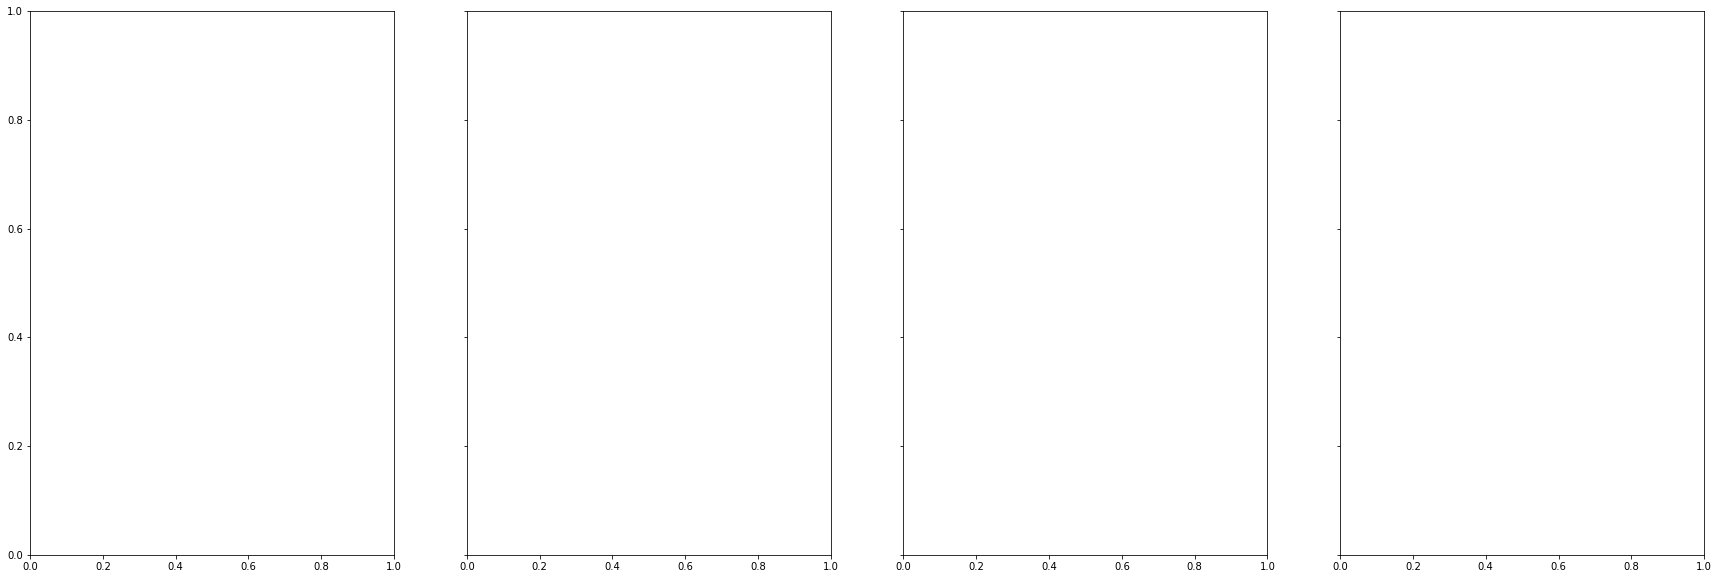

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (30, 10), sharey = True)

ax[0].imshow(imagem[..., 0], cmap = 'gray') # Primeiro canal da imagem
ax[0].set_title('Primeiro Canal')
ax[1].imshow(imagem[..., 1], cmap = 'gray') # Segundo canal da imagem
ax[1].set_title('Segundo Canal')
ax[2].imshow(imagem[..., 2], cmap = 'gray') # Terceiro canal da imagem
ax[2].set_title('Terceiro Canal')
ax[3].imshow(imagem) # Imagem completa com todos os canais
ax[3].set_title('Imagem Completa');

for (j,i),label in np.ndenumerate(imagem[..., 0]):
  ax[0].text(i, j, label, ha='center', va='center')

for (j,i),label in np.ndenumerate(imagem[..., 1]):
  ax[1].text(i, j, label, ha='center', va='center')

for (j,i),label in np.ndenumerate(imagem[..., 2]):
  ax[2].text(i, j, label, ha='center', va='center')
    
fig.tight_layout()

Caso trabalhemos com uma seção sísmica, por exemplo, cada pixel na imagem vai representar o valor da amplitude da onda. Se gerarmos atributos, cada pixel irá representar aquele dado transformado. Se gerarmos cinco atributos, por exemplo, serão necessárias 6 matrizes para descrever a seção e os demais atributos.

## Preparação dos Dados

**A qualidade do seu modelo preditivo irá depender não só do tipo de abordagem (algoritmo) que você escolheu, mas principalmente da qualidade do seus dados.** Assim, uma fase extremamente importante é a preparação dos dados, que pode ser subdividida em diversas subetapas, a exemplo: exploração/visualização dos dados, limpeza de dados, criação de novas features/variáveis, normalização dos dados, e estratégias de separação de teste e treino. Essas etapas serão discutidas adiantes, mas antes vamos fazer uma breve reflexão sobre a fase geral de preparação de dados.


Um exemplo, fora das geociências, sobre a importância da fase de preparação de dados está em AIs que discriminam pessoas com base em sua renda ou ainda em sua cor de pele. [Um caso](https://www.technologyreview.com/2019/01/21/137783/algorithms-criminal-justice-ai/), por exemplo, pode ser citado através dos controversos algoritmos de avaliação de risco criminal aplicados nos EUA.

> "As ferramentas de avaliação de risco são projetadas para fazer uma coisa: tomar os detalhes do perfil de um réu e cuspir uma pontuação de reincidência - um único número estimando a probabilidade de que ele ou ela reincidirá. Um juiz então leva em conta essa pontuação em uma quantidade inumerável de decisões que podem determinar que tipo de serviços de reabilitação determinados réus devem receber, se eles devem ser mantidos na prisão antes do julgamento e quão severas suas sentenças devem ser. Uma pontuação baixa abre caminho para um destino mais amável. Uma pontuação alta faz exatamente o oposto."

> [...] algoritmos de aprendizado de máquina usam estatísticas para encontrar padrões nos dados. Portanto, se você alimentá-lo com dados históricos de crimes, ele selecionará os padrões associados ao crime. Mas esses padrões são correlações estatísticas - nem de longe o mesmo que causações. Se um algoritmo descobrir, por exemplo, que a baixa renda está correlacionada com a alta reincidência, não ficaria sabendo se a baixa renda realmente causou o crime. Mas é exatamente isso que as ferramentas de avaliação de risco fazem: elas transformam percepções correlativas em mecanismos de pontuação causal.

E nas geociências que tipo de erros podem ser gerados por uma fase de preparação dos dados inadequada?

[Outro link sobre esse tipo de assunto, caso queiram saber mais](https://www.technologyreview.com/2020/07/17/1005396/predictive-policing-algorithms-racist-dismantled-machine-learning-bias-criminal-justice/)

Na célula abaixo, iremos realizar a leitura do nosso conjunto de dados, em seguida passaremos por diversas partes do workflow.

In [4]:
caminho = 'https://github.com/marcosjacinto/MLIntroGeoscience/blob/master/data.zip?raw=true'
dataset = pd.read_csv(caminho, compression='zip')

A célula abaixo irá nos informar o número de poços diferentes no nosso conjunto de dados.

In [ ]:
numeroDePocos = len(list(np.unique(dataset.WELL)))
print(f'Temos nesse dataset {numeroDePocos} poços diferentes')

Temos nesse dataset 98 poços diferentes


### Explorando e Visualizando os Dados

Iniciaremos nosso worfklow observando as algumas características do dataset e das suas variáveis.

O primeiro passo é observar quais são as variáveis presentes que podem nos auxiliar para montar nosso modelo preditivo.

O dataset contém as seguintes informações:
* WELL: nome do poço;
* DEPTH_MD: profundidade medida;
* X_LOC: coordenada UTM X; 
* Y_LOC: coordenada UTM Y;
* Z_LOC: profundidade Z;
* GROUP: grupo litoestratigráfico;
* FORMATION: formação litoestratigráfica;

As colunas a seguir, contidas no dataset, são referentes às curvas de geofísica de poço, dentre outras curvas:
* BS: tamanho da broca;
* CALI: caliper;
* RDEP: resistividade profunda;
* RHOB: densidade;
* GR: raios gama;
* SGR: raios gama espectral;
* RMED: resistividade média;
* ROP: taxa de penetração;
* NPHI: porosidade neutrão;
* PEF: fator de absorção fotoelétrico;
* RSHA: resistividade rasa;
* DTS: sônico (cisalhante)
* DTC: sônico (compressional)

Possui ainda colunas referentes a litologia, o que queremos predizer:
* LITHOLOGY: tipo de rocha;
* CONFIDENCE: confiança na interpretação dessa litologia (1: alta, 2: média, 3: baixa).

A célula abaixo irá nos mostrar um exemplo de como estão as colunas no nosso dataset, e como está seu preenchimento.

In [ ]:
dataset.sample(5)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE
499495,30/3-3,1307.9260,497355.65625,6737313.0,-1285.885254,HORDALAND GP.,Utsira Fm.,18.073734,1.178175,1.174532,1.141961,2.092414,33.662785,NaN,NaN,5.717470,144.297089,58.078205,NaN,NaN,NaN,NaN,0.003554,NaN,NaN,NaN,1.178585,1,2.0
350762,25/5-1,3403.5760,475889.46875,6621542.0,-3377.463867,DUNLIN GP.,Statfjord Fm.,8.179700,0.894103,0.616308,0.460199,2.251279,17.566011,NaN,0.220489,2.645055,89.375015,201.782562,NaN,8.985073,NaN,NaN,-0.022916,0.148585,NaN,NaN,0.881950,0,1.0
1151380,36/7-3,2813.3600,556080.18750,6810860.0,-2788.203857,CROMER KNOLL GP.,Aasgard Fm.,NaN,NaN,3.047631,2.824565,2.467955,60.489971,NaN,0.172755,2.467954,79.808754,NaN,NaN,NaN,NaN,NaN,2.467955,NaN,NaN,26.2964,NaN,0,1.0
343754,25/5-1,2321.3360,475884.18750,6621553.0,-2295.425293,ROGALAND GP.,Lista Fm.,15.599591,NaN,1.375966,1.575163,2.253425,41.241310,NaN,NaN,2.806072,109.663445,91.049179,NaN,6.428600,NaN,NaN,0.005118,0.136602,NaN,NaN,NaN,0,1.0
1159724,7/1-1,1473.4008,450392.71875,6406644.5,-1439.369629,HORDALAND GP.,NaN,18.068047,0.805684,0.802985,0.688841,NaN,44.865829,NaN,NaN,NaN,NaN,38.764164,17.5,0.768321,NaN,0.568045,NaN,1.461882,NaN,NaN,NaN,1,1.0


É importante também ter uma noção básica da distribuição dos valores de cada variável. A célula abaixo nos mostrará alguns parâmetros estatísticos, onde:
* count: contagem do número de registros dessa variável;
* mean: valor médio;
* std: desvio-padrão;
* min: valor mínimo:
* 25%: percentil 25;
* 50%: percentil 50 ou mediana;
* 75%: percentil 75;
* max: valor máximo.

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPTH_MD,1170511.0,2.184087e+03,997.182105,1.360860e+02,1.418597e+03,2.076605e+03,2.864393e+03,5.436632e+03
X_LOC,1159736.0,4.856310e+05,34556.414531,4.268988e+05,4.547996e+05,4.769203e+05,5.201532e+05,5.726328e+05
Y_LOC,1159736.0,6.681276e+06,128152.434683,6.406641e+06,6.591327e+06,6.737311e+06,6.784886e+06,6.856661e+06
Z_LOC,1159736.0,-2.138527e+03,970.942584,-5.395563e+03,-2.811502e+03,-2.042785e+03,-1.391866e+03,-1.110860e+02
CALI,1082634.0,1.318568e+01,3.798907,2.344000e+00,9.429712e+00,1.255575e+01,1.671075e+01,2.827900e+01
RSHA,630650.0,1.069466e+01,100.642597,1.000000e-04,8.541203e-01,1.399020e+00,3.099348e+00,2.193905e+03
RMED,1131518.0,4.986978e+00,54.672687,-8.418695e-03,9.140862e-01,1.443584e+00,2.680930e+00,1.988616e+03
RDEP,1159496.0,1.069103e+01,113.948005,3.170056e-02,9.102396e-01,1.439000e+00,2.557220e+00,1.999887e+03
RHOB,1009242.0,2.284987e+00,0.253284,7.209712e-01,2.092203e+00,2.321228e+00,2.488580e+00,3.457820e+00
GR,1170511.0,7.091370e+01,34.231486,1.092843e-01,4.762722e+01,6.836763e+01,8.903551e+01,1.076964e+03


Algo que devemos fazer é observar o comportamento dessas curvas nos poços. As células abaixo nos permitem visualizar os diferentes poços contidos no nosso dataset.

Primeiramente, execute a célula abaixo para criar uma função que será utilizada pra visualizar os poços.

In [ ]:
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = ListedColormap(['yellow', 'yellowgreen', 'forestgreen', 'springgreen', 'teal',
                       'steelblue', 'darkslategray', 'paleturquoise', 'darkturquoise',
                       'saddlebrown', 'grey', 'orangered'])

def plotarPoco(dataFrame, numeroDoPoco):

  nomeDoPoco = dataFrame.WELL.unique()[numeroDoPoco]

  well = dataFrame[dataFrame.WELL == nomeDoPoco]

  assert numeroDoPoco < len(dataFrame.WELL.unique()), f'Inserir número do poço entre 0 e {len(dataFrame.WELL.unique())}'
  
  lithology_keys = {0: ['Sandstone', 'yellow'],
                 1: ['Sandstone/Shale', 'yellowgreen'],
                 2: ['Shale', 'forestgreen'],
                 3: ['Marl', 'springgreen'],
                 4: ['Dolomite', 'teal'],
                 5: ['Limestone', 'steelblue'],
                 6: ['Chalk', 'darkslategray'],
                 7: ['Halite', 'paleturquoise'],
                 8: ['Anhydrite', 'darkturquoise'],
                 9: ['Tuff', 'saddlebrown'],
                 10: ['Coal', 'grey'],
                 11: ['Basement', 'orangered']}

  fig, ax = plt.subplots(1, 6, figsize = (30, 15), sharey = False)

  ax[0].plot(well.CALI, well.DEPTH_MD, color = 'black',
             label = 'Caliper')
  ax[0].plot(well.BS, well.DEPTH_MD, color = 'red',
           label = 'Diâmetro da Broca')
  #ax[0].invert_yaxis()
  ax[0].grid()
  ax[0].set_title('Caliper')

  ax[1].set_title('Gamma Ray')
  ax[1].plot(well.GR, well.DEPTH_MD, color = 'green',
           label = 'Gamma Ray', linewidth = '0.5')
  ax[1].set_xlim(0, 150)
  axtwin1 = ax[1].twiny()
  axtwin1.plot(well.GR, well.DEPTH_MD, 'g--',
           label = 'Gamma Ray', linewidth = 0.5)
  axtwin1.set_xlim(150, 300)
  ax[1].grid()
  #ax[1].invert_yaxis()

  ax[2].set_title('Resistividade')
  ax[2].semilogx(well.RDEP, well.DEPTH_MD, color = 'r',
           label = 'Res. Profunda', linewidth = '0.5')
  ax[2].semilogx(well.RMED, well.DEPTH_MD, color = 'm',
           label = 'Res. Média', linewidth = '0.5')
  ax[2].semilogx(well.RSHA, well.DEPTH_MD, color = 'k',
           label = 'Res. Rasa', linewidth = '0.5')
  ax[2].set_xlim(0.2 , 2000)
  #ax[2].set_xticks([0.2, 2, 20, 200, 2000])
  ax[2].grid()
  #ax[2].invert_yaxis()
  ax[2].legend()

  ax[3].set_title('Sônico')
  ax[3].plot(well.DTC, well.DEPTH_MD, color = 'k',
             label = 'Sônico', linewidth = '0.5')
  ax[3].set_xlim(40,240)
  ax[3].grid()
  #ax[3].invert_yaxis()
  ax[3].invert_xaxis()

  ax[4].set_title('Densidade', color = 'r', fontsize = 12)
  ax[4].plot(well.NPHI, well.DEPTH_MD,
             label = 'Neutrão', color = 'b', linewidth = '0.5')
  ax[4].tick_params(axis='x', labelcolor='b')
  ax[4].set_xlim(-0.15, 0.45)
  ax[4].set_xticks(np.linspace(-0.15,0.45,4))
  ax[4].set_xlabel('Neutrão', color = 'b', fontsize = 12)
  ax[4].invert_xaxis()
  axtwin4 = ax[4].twiny()
  axtwin4.plot(well.RHOB, well.DEPTH_MD,
           label = 'Densidade', color = 'r', linewidth = '0.5')
  axtwin4.tick_params(axis='x', labelcolor= 'r')
  axtwin4.set_xlim(2, 3)
  axtwin4.set_xticks(np.linspace(2,3,5))  
  axtwin4.grid()
  ax[4].grid()
  #ax[4].invert_yaxis()

  im = ax[5].imshow(np.array(well.LITHOLOGY).reshape(-1, 1), aspect = 'auto',
               vmin = 0, vmax = 11, cmap = cmap,)
              #  extent = [0, 1, well.DEPTH_MD.iloc[-1], well.DEPTH_MD.iloc[0]])
  divider = make_axes_locatable(ax[5])
  cax = divider.append_axes("right", size="20%", pad=0.05)
  cbar=plt.colorbar(im, cax=cax, cmap = cmap)

  cbar.set_label((16*' ').join(['SS', 'SS-Sh', 'Sh', 
                               ' Ml', 'Dm', 'LS', 'Chk ', 
                                ' Hl', 'Ann', 'Tuf', 'Coal', 'Bsmt']))
  cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

   
  #ax[5].legend()

  ax[0].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[1].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[2].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[3].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[4].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[5].set_xticks([])
  ax[5].set_yticks([])

  ax[0].invert_yaxis()
  ax[1].invert_yaxis()
  ax[2].invert_yaxis()
  ax[3].invert_yaxis()
  ax[4].invert_yaxis()
  #ax[5].invert_yaxis()

Agora, execute a célula abaixo para escolher um número referente a um dos 96 poços E, em seguida, execute a próxima célula, para visualizar os dados do respectivo poço.

In [ ]:
numeroDoPoco = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Número do poço')
print('Selecione abaixo o número do poço:')
display(numeroDoPoco)

Selecione abaixo o número do poço:


IntSlider(value=1, description='Número do poço', max=96, min=1)

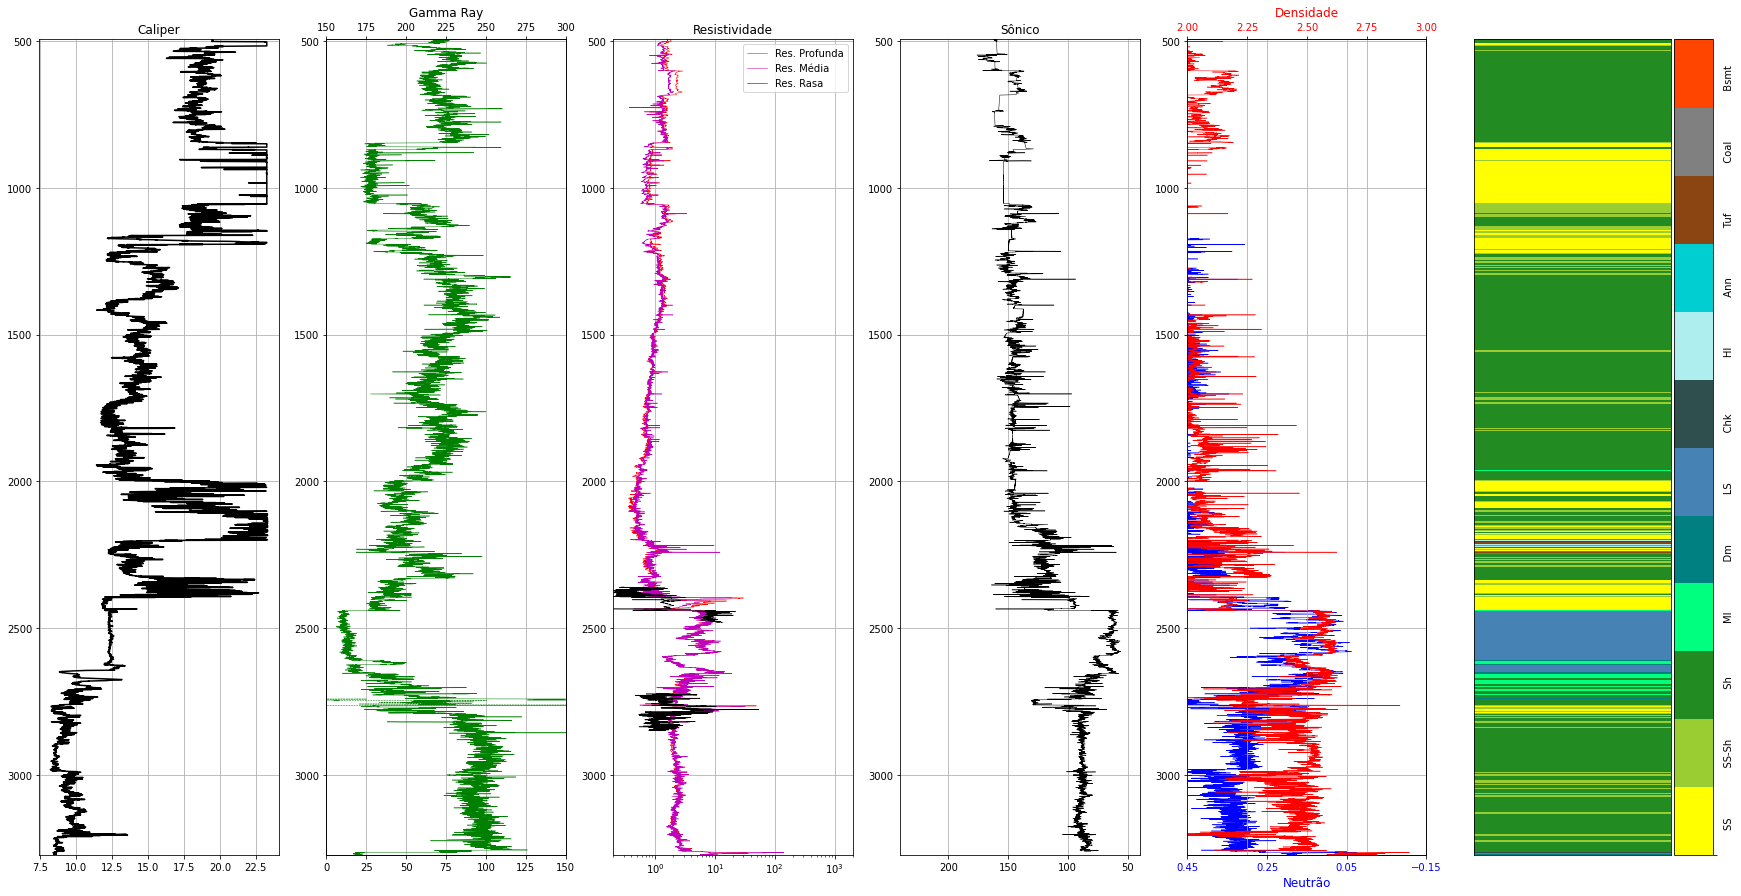

In [ ]:
plotarPoco(dataset, numeroDoPoco.value - 1)

Execute a célula abaixo para observar a distribuição dos poços em 2D e 3D.

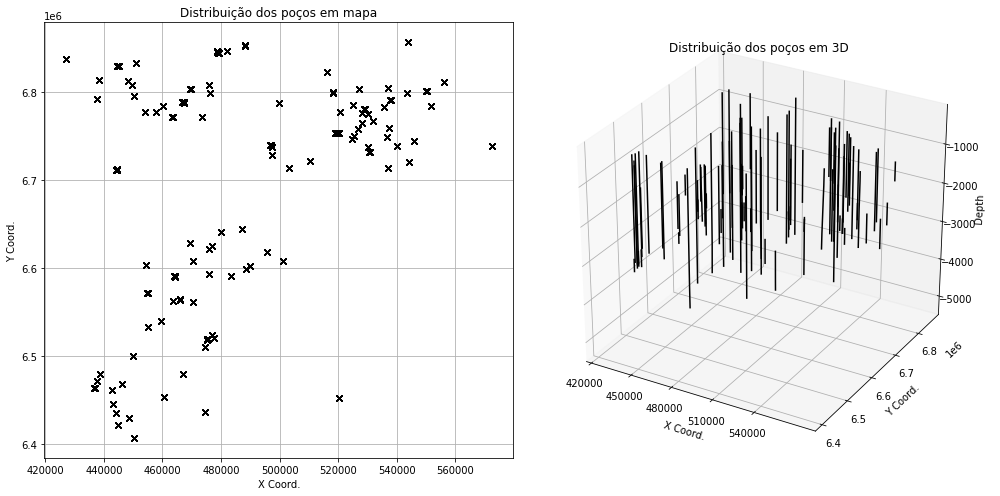

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))
ax[1].remove()
ax[1]=fig.add_subplot(1, 2, 2,projection='3d')

ax[0].set_xlabel('X Coord.')
ax[0].set_ylabel('Y Coord.')
ax[0].set_title('Distribuição dos poços em mapa')
ax[0].grid()

ax[1].set_xlabel('X Coord.')
ax[1].set_ylabel('Y Coord.')
ax[1].set_zlabel('Depth')
ax[1].set_title('Distribuição dos poços em 3D')
ax[1].set_xticks(range(420000, 560000, 30000))

for nomeDoPoco in dataset.WELL.unique():
  well = dataset[dataset.WELL == nomeDoPoco]
  ax[1].plot(well.X_LOC, well.Y_LOC, well.Z_LOC, color = 'black')
  ax[0].plot(well.X_LOC, well.Y_LOC, 'kx')

fig.tight_layout()

Devemos observar ainda quais as rochas existentes nos nossos poços e sua ocorrência relativa. A partir disso, é importante discutir quais problemas podem surgir devido a uma ocorrência baixa de um tipo de rocha, havendo também um alto número de ocorrências de outro(s) tipo(s) de rocha.

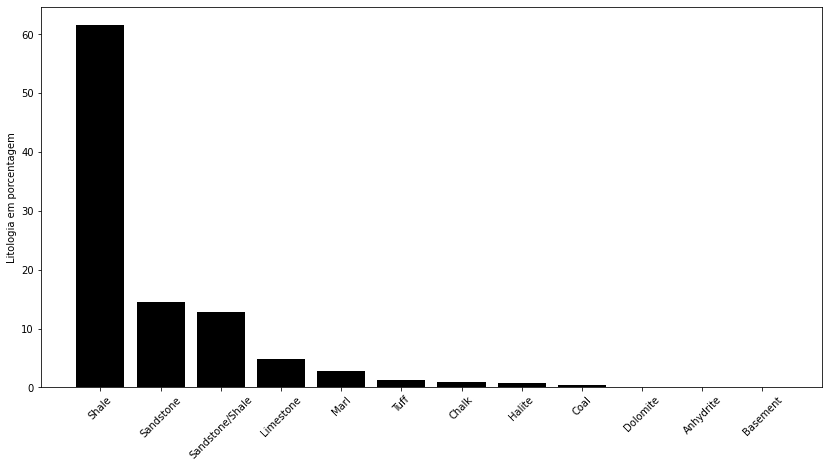

In [ ]:
lithology_keys = {0: 'Sandstone',
                 1: 'Sandstone/Shale',
                 2: 'Shale',
                 3: 'Marl',
                 4: 'Dolomite',
                 5: 'Limestone',
                 6: 'Chalk',
                 7: 'Halite',
                 8: 'Anhydrite',
                 9: 'Tuff',
                 10: 'Coal',
                 11: 'Basement'}


counts = dataset['LITHOLOGY'].value_counts()
names = []
percentage = []
N = dataset['LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage, color = 'k')
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Litologia em porcentagem');

### Criação de novas features/variáveis

É interessante se perguntar se as variáveis que estão no nosso conjunto de dados são suficientes para modelar o nosso problema. Além disso, devemos levar em conta quais modelos iremos utilizar. Modelos de Deep Learning, possuem a capacidade de durante o treinamento "extrair" novas features automaticamente, isso é exemplificado por exemplo em redes neurais convolucionais. O link exemplifica um caso do que uma rede neural convolucional aplicada à previsão de números aprende durante o treinamento.

[2D Visualization of a Convolutional Neural Network](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)

Modelos que não pertencem à classe de Deep Learning, por outro lado, não possuem a mesma capacidade, e, por consequência, se beneficiam bastante da chamada fase de <i>feature engineering</i>. Nessa fase é nosso papel gerar novas features/variáveis a partir do que já existe no nosso conjunto de dados atuais. Dentre os tipos de conhecimentos que podem nos ajudar nessa fase está o entendimento do próprio problema. Se estamos trabalhando com dados de poços, tipos de features novas que podem ser criadas podem ser similares ao que seria feito numa processo de interpretação petrofísica, por exemplo calculando valores de porosidade ou volume de folhelho.

Por isso, é importante a participação de um geólogo ou geofísico no processo, pois o mesmo poderá identificar como obter novas features, e terá maior capacidade para criticar esse procedimento bem como os resultados obtidos.

Outras features que podem gerados, por outro lado, podem depender de conhecimentos não necessariamente geológicos, mas matemáticos e/ou estatísticos, por exemplo. Isso justifica, por exemplo, a importância de demais profissionais envolvidos em projetos de Machine Learning. 

No exemplo abaixo, não iremos gerar uma variável resultante de uma interpretação petrofísica. Iremos criar uma <i>lag feature</i>. Não se preocupem muito com esse termo, basta entender que a partir da coluna de litologia iremos criar uma nova coluna que vai guardar qual foi a litologia anterior. Execute a célula abaixo para criar três colunas:


1.   Lag feature guardando a litologia imediatamente anterior;
2.   Lag feature guardando a décima litologia anterior;
3.   Lag feature guardando a centésima litologia anterior.




In [ ]:
pocos = dataset.WELL.unique()

dataset['LAG_LITO_1'] = -99
dataset['LAG_LITO_10'] = -99
dataset['LAG_LITO_100'] = -99

for poco in pocos:
  dataset.loc[dataset.loc[:, 'WELL'] == poco, 'LAG_LITO_1'] = dataset.loc[dataset.loc[:, 'WELL'] == poco, 'LITHOLOGY'].shift(1)
  dataset.loc[dataset.loc[:, 'WELL'] == poco, 'LAG_LITO_10'] = dataset.loc[dataset.loc[:, 'WELL'] == poco, 'LITHOLOGY'].shift(10)
  dataset.loc[dataset.loc[:, 'WELL'] == poco, 'LAG_LITO_100'] = dataset.loc[dataset.loc[:, 'WELL'] == poco, 'LITHOLOGY'].shift(100)

Vejamos agora como fica o nosso banco de dados:

In [ ]:
dataset.sample(15)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE,LAG_LITO_1,LAG_LITO_10,LAG_LITO_100
624965,31/3-3,965.218000,545893.81250,6744763.5,-938.824097,ROGALAND GP.,Sele Fm.,NaN,0.984055,0.983925,0.871550,2.063478,84.320908,NaN,0.202794,NaN,148.278488,32.290825,NaN,NaN,NaN,NaN,-0.003745,NaN,NaN,NaN,NaN,2,1.0,2.0,2.0,2.0
901731,34/7-20,1630.126000,448295.31250,6812831.5,-1604.088501,HORDALAND GP.,Utsira Fm.,17.996305,0.534625,0.463354,0.505283,1.934142,76.353165,NaN,NaN,NaN,164.300964,40.333870,NaN,NaN,NaN,NaN,-0.008104,NaN,NaN,NaN,NaN,2,1.0,2.0,2.0,5.0
392790,25/7-2,2402.456000,454800.46875,6571035.0,-2377.246826,ROGALAND GP.,Heimdal Fm.,17.919294,1.539200,1.051511,1.222225,2.316276,53.050381,NaN,NaN,9.705952,126.942017,64.783585,17.500000,13.197038,NaN,0.296571,-0.007289,NaN,1.190330,NaN,1.180943,2,1.0,2.0,0.0,0.0
637730,31/3-4,1636.233638,537242.75000,6759164.5,-1596.098267,VIKING GP.,Draupne Fm.,8.353770,1.549604,1.520875,1.531367,2.418668,208.430588,NaN,0.366170,4.764326,129.229630,NaN,8.500000,24.146050,320.463776,NaN,0.046221,NaN,0.990073,28.044868,NaN,2,1.0,2.0,2.0,3.0
447364,25/9-1,2406.206000,483525.00000,6590324.5,-2380.926514,DUNLIN GP.,Statfjord Fm.,8.636987,NaN,NaN,1814.213745,2.736465,56.881294,NaN,0.032457,4.872802,49.477066,NaN,8.500000,113.529999,NaN,NaN,0.111178,0.152180,343.543396,NaN,31857.078125,5,1.0,5.0,0.0,1.0
742973,33/9-17,2197.017985,438453.65625,6814154.5,-2170.250977,SHETLAND GP.,Kyrre Fm.,8.907711,0.978465,0.956176,0.908919,2.502657,85.265686,NaN,0.381912,3.698865,118.779274,94.444099,8.500000,NaN,NaN,NaN,-0.005800,NaN,NaN,13.522215,1.335233,2,1.0,2.0,2.0,2.0
303075,25/3-1,2958.792000,487272.40625,6643969.0,-2936.400635,CROMER KNOLL GP.,Vaale Fm.,12.549116,NaN,1.230293,1.159058,2.521213,57.078156,NaN,NaN,4.164804,98.043015,213.267548,12.250001,27.492233,NaN,0.293136,0.033617,2.396528,NaN,NaN,NaN,2,1.0,2.0,2.0,2.0
369151,25/6-1,2714.880000,488709.18750,6598748.5,-2688.755127,DUNLIN GP.,Smith Bank Fm.,13.191280,2.513800,2.257360,2.048040,2.258472,80.382919,NaN,0.272735,NaN,93.054436,191.355957,12.250001,8.056440,NaN,0.941280,0.142550,0.133007,NaN,NaN,NaN,2,1.0,2.0,2.0,2.0
500902,30/3-3,1521.790000,497354.00000,6737314.0,-1499.735962,HORDALAND GP.,Utsira Fm.,17.454796,1.567776,0.940774,0.924939,2.052466,34.503754,NaN,NaN,4.665710,144.347137,58.568863,NaN,NaN,NaN,NaN,0.005810,NaN,NaN,NaN,1.571115,2,1.0,2.0,2.0,2.0
399107,25/7-2,3362.640000,454828.12500,6571002.0,-3336.407959,SHETLAND GP.,Svarte Fm.,13.351600,8.186409,3.370790,0.400174,2.586343,38.079735,NaN,NaN,NaN,77.021393,NaN,12.250001,6.912904,NaN,1.101600,-0.011199,NaN,6.856670,NaN,7.076650,2,1.0,2.0,2.0,2.0


### Limpeza dos Dados

A limpeza de dados é uma das etapas mais importantes no workflow de um trabalho de Machine Learning. É importante ter qualidade nos dados, pois não importa o quão sofisticado e avançado seja o modelo que você vai criar, sem dados de qualidade, eles não serão realmente válidos ou mesmo irão retornar um reultado medíocre.

---

O tipo de limpeza de dados que será executada dependerá do problema que está sendo resolvido e tambem dos tipos de dados com que se está trabalhando. Para essa etapa também é fundamental compreender o máximo possível sobre os dados sendo utilizados. 

Alguns exemplos do que pode ser realizado nessa etapa são: 

1.   Tratamento de valores anômalos;
2.   Checagem de validade dos dados;
3.   Modificação do formato dos dados;
4.   Padronização dos dados;
5.   Tratamento de valores ausentes.

Dentre outros.

#### Apresentando os NaNs

<center> 
Lixo entra, lixo sai.
</center> 

<figure>
<center>
<img src='https://imgs.xkcd.com/comics/machine_learning.png' />
<figcaption>Muita atenção com os dados que estão sendo utilizados [1]. </figcaption></center>
</figure>

O que é um NaN? Essa sigla significa **Not a Number**, e é usada para representar um valor número indefinido ou que não pode ser representado. A raiz quadrada de um número negativo ou uma divisão por zero, são exemplos de operações que retornariam *NaNs* como resultados.

A exemplo de dados de poços, os NaNs podem aparecer no intervalo de profundidade que a ferramenta não realizou medidas ou mesmo quando a ferramenta geofísica falha e não registra um valor a uma dada profundidade. No arquivo LAS ocorre um valor nulo, geralmente representado pelo valor -999.25.

No python ele em geral é representado por:

```
np.nan
```

Abaixo iremos exemplificar algumas situações relacionadas aos NaNs e em seguida sua importância dentro do contexto de Machine Learning.

[[1] - Referência da figura](https://subscription.packtpub.com/book/application_development/9781788838535/1/ch01lvl1sec12/garbage-in-garbage-out)

In [ ]:
print('Realizando operações que resultam em NaN:')
print(f'Ao calcular a raíz quadrada de -1, o valor retornado é: {np.sqrt(-1)}')
print(f'Ao calcular 10 dividido por 0, o valor retornado é: {np.divide(10,0)}')
print()

Realizando operações que resultam em NaN:
Ao calcular a raíz quadrada de -1, o valor retornado é: nan
Ao calcular 10 dividido por 0, o valor retornado é: inf



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



Observem que um dos resultados retornou o valor 'inf', resultado de uma divisão por zero. Esse valor também irá prejudicar os modelos preditivos e deve ser evitado.

In [ ]:
exemplo = np.array([1, 2, 3, 4, 5])
print('Array de exemplo:')
print(exemplo)

Array de exemplo:
[1 2 3 4 5]


In [ ]:
print('Somando cada elemento da array com um NaN:')
print(f'{exemplo} + {np.nan} = {exemplo + np.nan}')

Somando cada elemento da array com um NaN:
[1 2 3 4 5] + nan = [nan nan nan nan nan]


In [ ]:
print('Multiplicando cada elemento da array por um NaN:')
print(f'{exemplo} * {np.nan} = {exemplo * np.nan}')

Multiplicando cada elemento da array por um NaN:
[1 2 3 4 5] * nan = [nan nan nan nan nan]


Como os NaNs não são exatamente números, cálculos que os envolvam geram também NaNs. Observem a partir dos exemplos acima que os NaNs ao interagirem com outros números (somar, multiplicar ou qualquer outra operação) irão ser 'propagados'. 

Para Machine Learning, que depende inteiramente de operações matemáticas, os NaNs são indesejáveis. Algumas possibilidades de como resolver a presença de NaNs na base de dados são:
- Eliminar as observações que contém NaNs;
- Substituir NaNs por algum valor como zero, mediana, média, o valor imediatamente anterior, ou o valor mais comum, por exemplo.

#### Observando os NaNs dentro da base de dados

Primeiro vamos observar a cobertura de dados na base de treinos. Abaixo, veremos o nome da coluna representando uma variável diferente, e onde há a presença de dados veremos um preenchimento cinza. Por outro lado, onde há ausência de dados, ou seja, ocorrem NaNs, veremos branco no lugar do cinza.



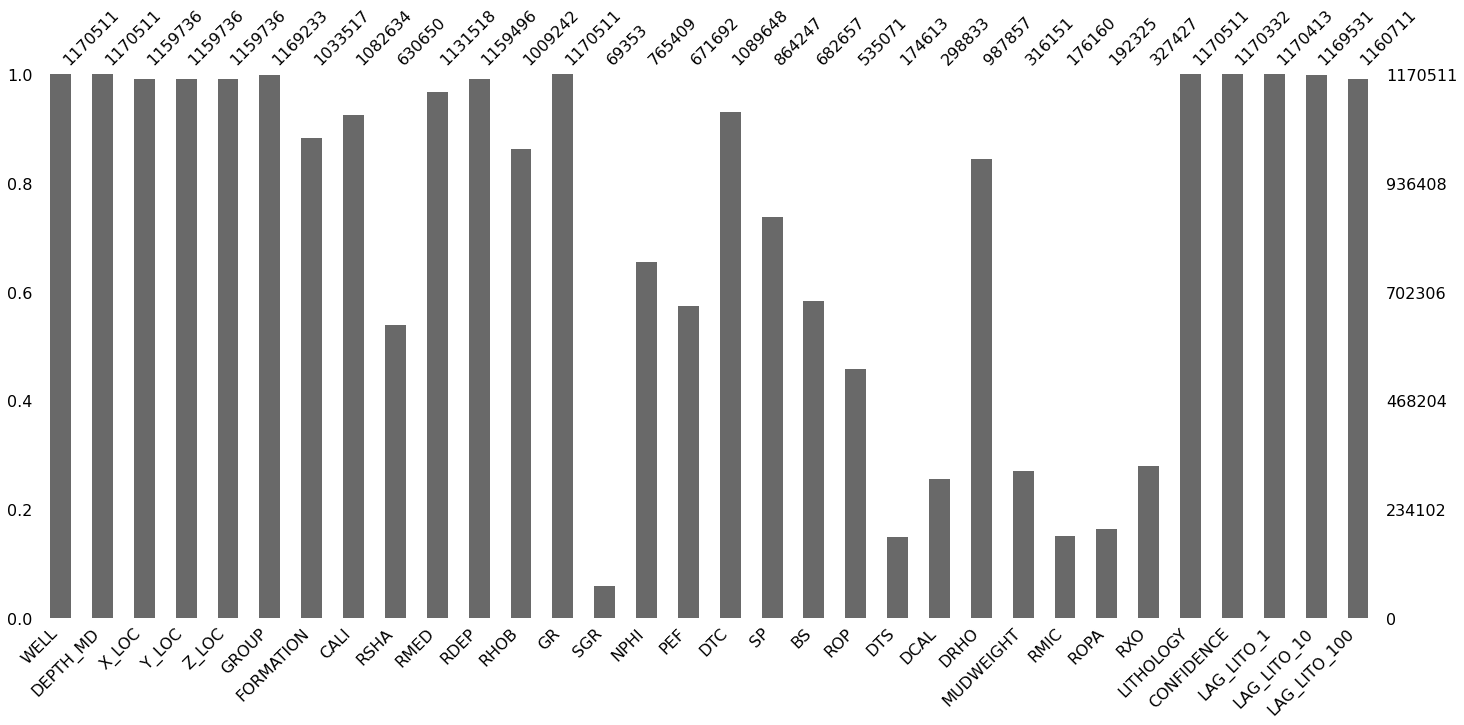

In [ ]:
msno.bar(dataset);

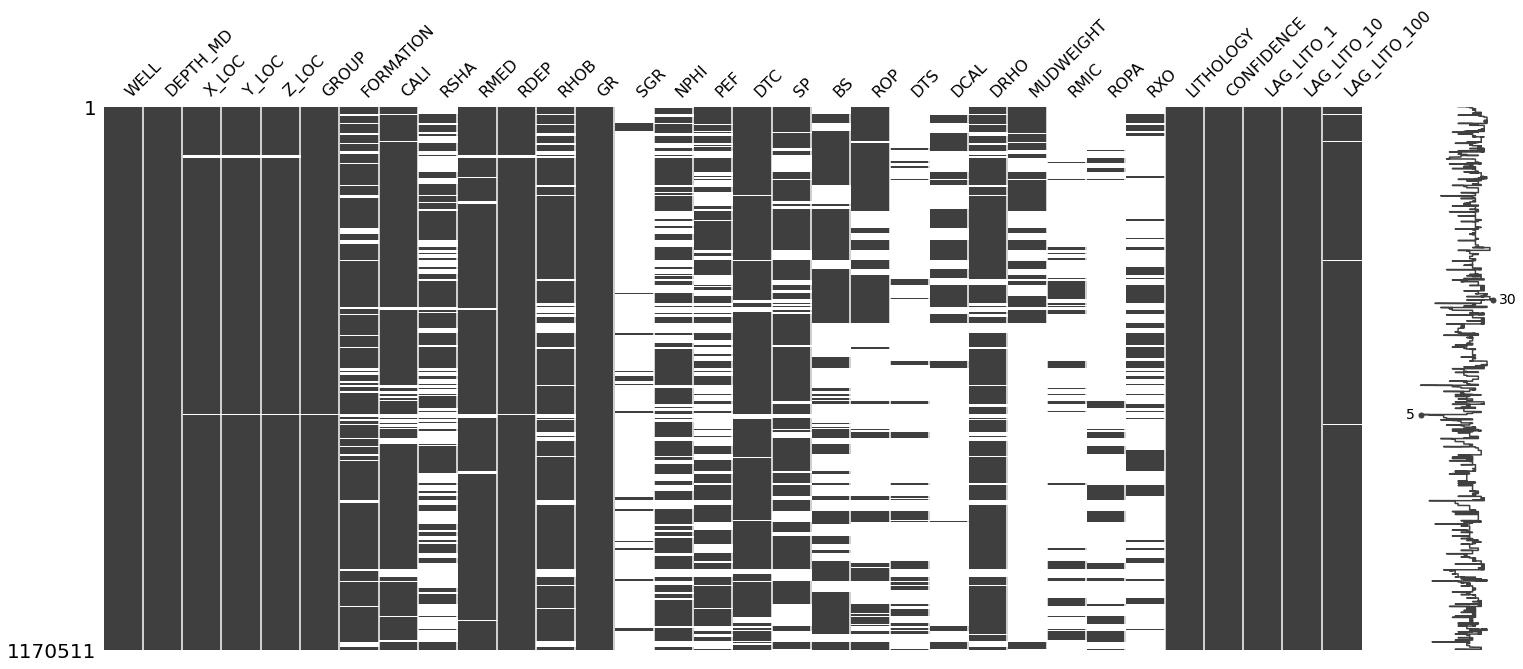

In [ ]:
msno.matrix(dataset);

#### Tratando os NaNs

Uma vez que observamos a presença e a distribuição de NaNs na base de dados, temos algumas perguntas a fazer:

1. Quais colunas (variáveis) iremos utilizar passar os nossos modelos realizarem as predições?
2. Das colunas que escolhemos iremos eliminar as observações que contêm ausência de informação (NaN) ou iremos preencher com algum valor?
3. Se escolhermos eliminar as observações com NaNs, como fica a distribuição de classes? Todas as classes estão presentes ainda ou alguma foi eliminada?

Então, baseando-se no que discutimos até agora. Quais colunas vocês usariam?

In [ ]:
datasetLimpo = dataset.drop(columns = ['SGR', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC',
                                       'ROPA', 'RXO', 'RSHA', 'ROP', 'BS', 'PEF'])

Vamos eliminar também colunas que não pretendemos utilizar durante o treinamento.

In [ ]:
datasetLimpo = datasetLimpo.drop(columns = ['GROUP', 'FORMATION'])
datasetLimpo = datasetLimpo.drop(columns = ['X_LOC', 'Y_LOC', 'Z_LOC', 'CONFIDENCE'])

Veja o efeito disso no nosso conjunto de dados:

In [ ]:
datasetLimpo.sample(15)

,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,DRHO,LITHOLOGY,LAG_LITO_1,LAG_LITO_10,LAG_LITO_100
989701,35/11-11,2071.443600,12.887450,1.771150,1.532201,2.436229,110.811234,0.371536,111.200279,65.319534,-0.004079,2,2.0,2.0,5.0
555299,31/2-19 S,2697.190400,12.778955,3.663275,3.519905,2.253356,314.483582,0.403045,107.238464,158.333664,0.013676,2,2.0,2.0,2.0
663432,31/5-4 S,250.518000,NaN,NaN,NaN,NaN,46.412479,NaN,NaN,NaN,NaN,2,2.0,2.0,2.0
173787,16/7-5,1105.847985,17.564644,0.674413,0.699931,NaN,35.214809,NaN,164.819092,42.756783,NaN,0,0.0,2.0,2.0
1143842,35/9-6 S,2991.920000,8.652746,2.104557,1.819306,2.534438,81.006340,0.255486,69.974854,NaN,0.019777,0,0.0,2.0,2.0
345077,25/5-1,2522.432000,12.196471,0.739798,0.687994,2.234935,26.989412,NaN,106.891167,93.290459,-0.027514,0,0.0,1.0,0.0
178288,16/7-5,1789.999985,13.789225,0.615039,0.629329,1.953632,68.109398,0.529826,144.082550,69.365807,-0.020024,2,2.0,2.0,2.0
815316,34/11-1,4512.939000,11.651427,3.241597,3.042292,2.604584,72.765739,0.248809,83.761681,NaN,NaN,1,1.0,2.0,1.0
461344,26/4-1,2701.120200,8.800206,2.319372,1.531953,2.408411,171.169418,0.392420,110.997604,53.014870,-0.009601,2,2.0,2.0,2.0
1006537,35/11-12,1841.210000,NaN,0.581062,0.649325,NaN,153.922485,NaN,138.861176,NaN,NaN,2,2.0,2.0,2.0


Vamos tratar os NaNs que surgiram com a criação das lag features referentes à litologia, de um modo diferente através de uma técnica chamada one-hot encoding.

Imagine a seguinte representação das litologias através de números:

\begin{bmatrix}
0 \\ 
1 \\
2 \\
2 \\
1
\end{bmatrix}

Onde 0 representa a primeira litologia, 1 a segunda litologia, e 2 a terceira litologia. Através de one-hot encoding transformamos o vetor acima em uma matriz, cuja coluna agora representa a litologia, o 0 representa ausência e 1 indica presença. Veja que não perdemos nenhuma das informações acima, apenas mudamos como representá-las:

\begin{bmatrix}
1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}

Imagine agora a presença de um NaN na coluna de litologias:

\begin{bmatrix}
0 \\ 
1 \\
2 \\
NaN \\
1
\end{bmatrix}

Transformando com one-hot encoding eliminamos-o:


\begin{bmatrix}
1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 0 \\
0 & 1 & 0
\end{bmatrix}

Execute a célula abaixo para realizar essa transformação, e depois veja como ficou o nosso dataset.


In [ ]:
dataset = pd.get_dummies(datasetLimpo, columns = ['LAG_LITO_1', 'LAG_LITO_10', 'LAG_LITO_100'])
dataset.sample(15)

,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,DRHO,LITHOLOGY,LAG_LITO_1_0.0,LAG_LITO_1_1.0,LAG_LITO_1_2.0,LAG_LITO_1_3.0,LAG_LITO_1_4.0,LAG_LITO_1_5.0,LAG_LITO_1_6.0,LAG_LITO_1_7.0,LAG_LITO_1_8.0,LAG_LITO_1_9.0,LAG_LITO_1_10.0,LAG_LITO_1_11.0,LAG_LITO_10_0.0,LAG_LITO_10_1.0,LAG_LITO_10_2.0,LAG_LITO_10_3.0,LAG_LITO_10_4.0,LAG_LITO_10_5.0,LAG_LITO_10_6.0,LAG_LITO_10_7.0,LAG_LITO_10_8.0,LAG_LITO_10_9.0,LAG_LITO_10_10.0,LAG_LITO_10_11.0,LAG_LITO_100_0.0,LAG_LITO_100_1.0,LAG_LITO_100_2.0,LAG_LITO_100_3.0,LAG_LITO_100_4.0,LAG_LITO_100_5.0,LAG_LITO_100_6.0,LAG_LITO_100_7.0,LAG_LITO_100_8.0,LAG_LITO_100_9.0,LAG_LITO_100_10.0,LAG_LITO_100_11.0
811883,34/11-1,3991.123000,8.901519,2.050090,1.913876,2.500513,121.847771,0.510703,107.582184,NaN,NaN,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
570746,31/2-7,1446.336932,17.965038,0.801575,0.760369,2.177364,74.007095,0.447989,144.753082,73.664742,-0.003780,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
677579,31/6-5,903.823000,NaN,0.936406,1.000773,1.920093,81.981148,NaN,148.358429,14.372981,-0.024085,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
689010,31/6-8,1254.892434,NaN,0.797517,0.714152,1.873907,80.666016,0.459202,148.993942,13.293506,0.000897,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1058344,35/12-1,1078.526815,17.494183,0.574524,1.452436,2.132932,83.905647,NaN,118.762741,215.506241,-0.034093,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
382618,25/6-3,2093.123729,8.347434,0.534264,0.659515,2.074572,53.459904,0.336093,107.050049,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16108,15/9-13,2943.552000,8.602881,2.204974,2.025494,2.521090,109.336578,0.292328,87.726128,126.475601,-0.025814,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1088309,35/4-1,3633.756000,12.887605,1.943952,1.727133,2.574958,51.032948,0.330000,96.397018,NaN,-0.001632,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
495083,30/3-3,637.302000,10.657014,2.236160,2.491199,2.170423,93.830193,NaN,138.205856,55.992550,0.009074,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
26817,15/9-15,1784.400000,14.179540,0.758380,0.731512,2.004065,65.799171,0.501403,157.972107,69.117592,0.050602,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Vejamos agora o nosso dataset, como se encontra:

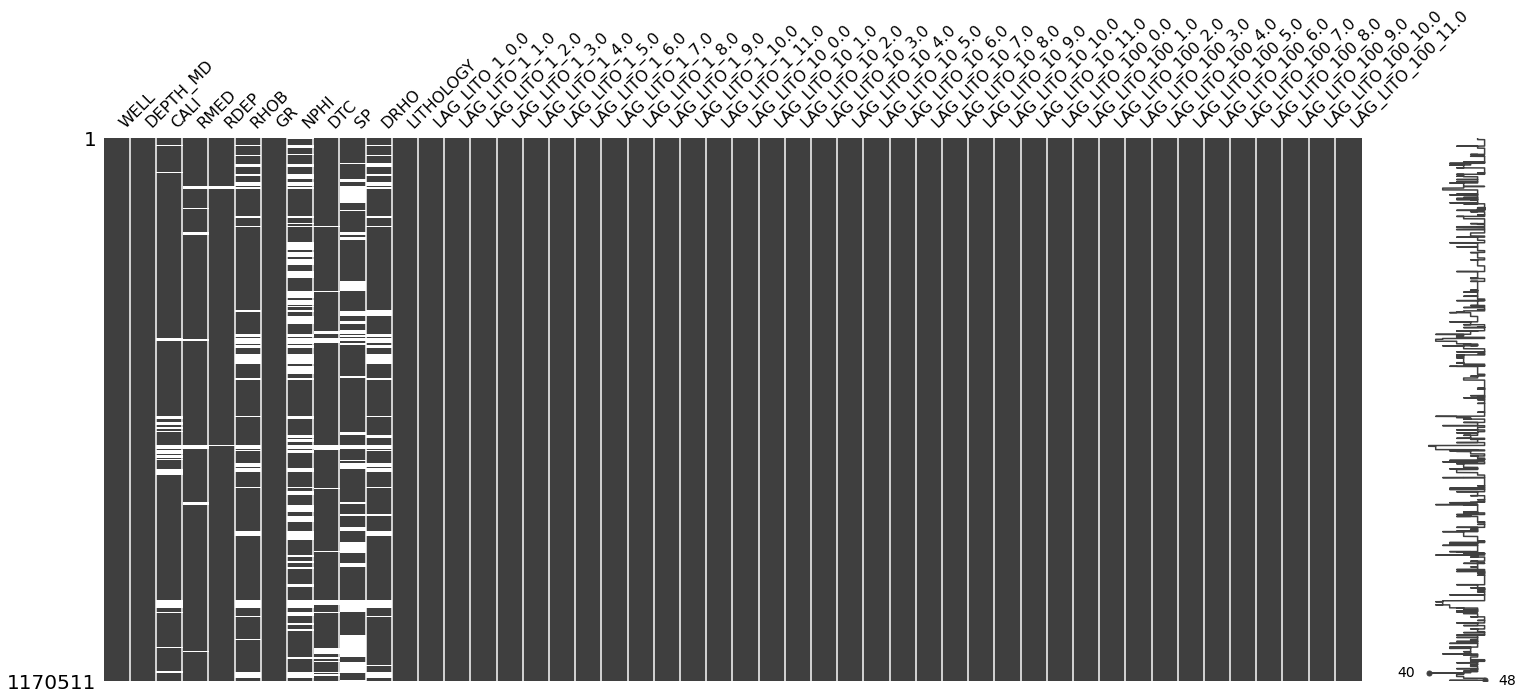

In [ ]:
msno.matrix(dataset);

Iremos tratar o restante dos NaNs eliminando as linhas que contém algum NaN.

In [ ]:
tamanhoInicial = dataset.shape[0]
finalDataset = dataset.dropna()
tamanhoFinal = finalDataset.shape[0]
num = len(list(np.unique(finalDataset.WELL)))

print(f'Agora temos {num} poços.') 
print(f'O tamanho inicial de exemplos era de {tamanhoInicial} e agora temos {tamanhoFinal} exemplos.')
print(f'Isso representa um redução de {100 - (100*tamanhoFinal/tamanhoInicial):.2f}%')

Agora temos 64 poços.
O tamanho inicial de exemplos era de 1170511 e agora temos 473713 exemplos.
Isso representa um redução de 59.53%


Iremos eliminar também o nome do poço, pois ele não nos fornece uma informação necessariamente importante para realizar a previsão das litologias.

In [ ]:
finalDataset.drop(columns = ['WELL'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Feito isso, vamos verificar novamente como está a nossa base de dados e visualizar a ocorrência de NaNs na mesma.

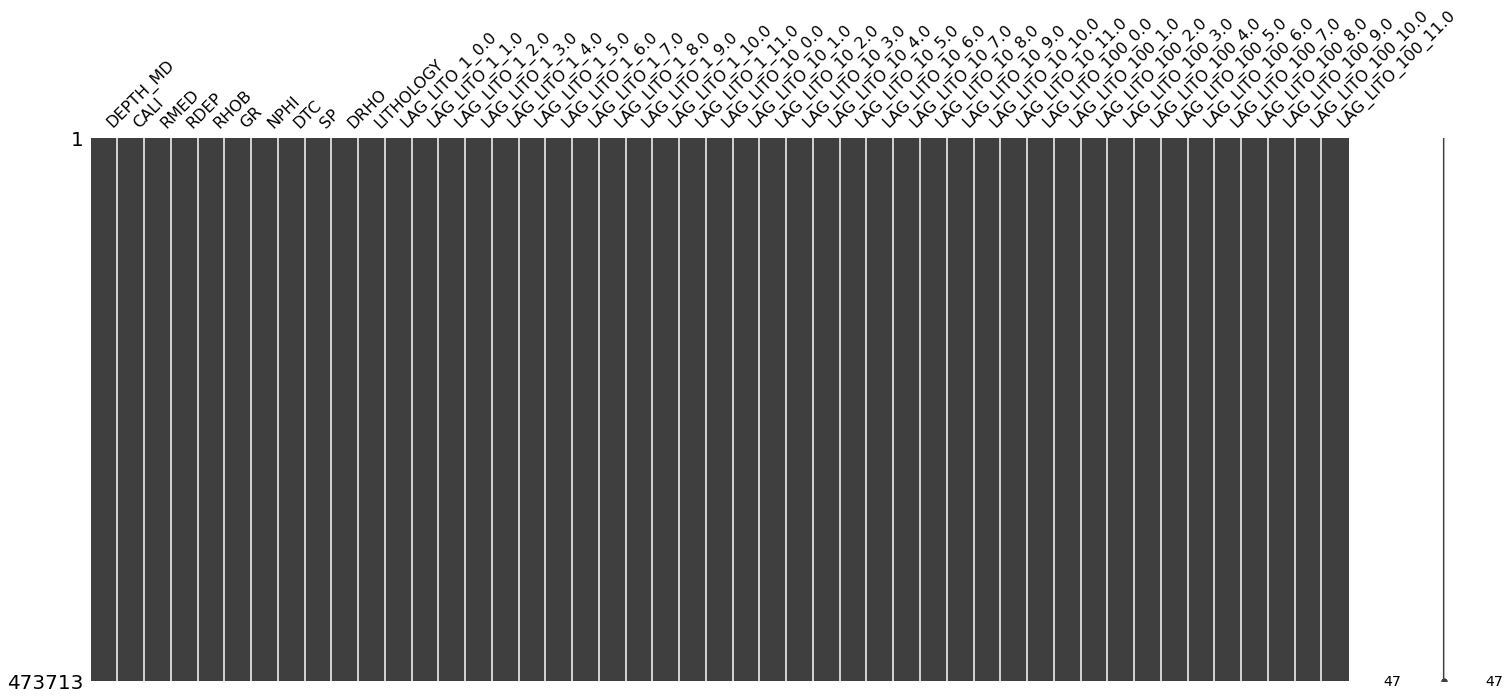

In [ ]:
msno.matrix(finalDataset);

### Separando em Teste e Treino

Vejamos abaixo algumas estratégias que devemos considerar para podermos avaliar a performance dos modelos que iremos desenvolver.



1.   <b>Estratégia 1</b>

<center> 
A estratégia mais básica de separação, separar o dataset original no Treino e Teste.
</center> 

<figure>
<center>
<img src='https://developers.google.com/machine-learning/crash-course/images/PartitionTwoSets.svg' />
<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg' />
<figcaption> Avaliamos a performance no conjunto de teste, e escolhemos o melhor resultado em função disso [2, 3]. </figcaption></center>
</figure>

2.   <b>Estratégia 2</b>

<center> 
Uma estratégia mais robusta, separar o dataset original no Teste, Validação e Teste.
</center> 

<figure>
<center>
<img src='https://developers.google.com/machine-learning/crash-course/images/PartitionThreeSets.svg' />
<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithValidationSet.svg' />
<figcaption>Avaliamos a performance no conjunto de validação, e escolhemos o melhor resultado em função disso [2, 3]. </figcaption></center>
</figure>

É importante ressaltar que quando se trata de dados geológicos, alguns fatores poderiam ser considerados durante a separação. Por exemplo, poderíamos separar o conjunto de teste considerando todos os dados ou considerando os poços. No primeiro caso, aleatoriamente partes diferentes de poços seriam selecionadas para teste. No segundo caso, selecionaríamos aleatoriamente poços inteiros para testes. Porém, deve se ter certeza que durante a separação, tenhamos todos os tipos de litologias tanto no treino quanto no teste.

[[2] - Referência da Figura](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)

[[3] - Referência da Figura](https://developers.google.com/machine-learning/crash-course/validation/another-partition)

In [ ]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(finalDataset, test_size = 0.2, stratify = finalDataset.LITHOLOGY)

# Explicar as diferentes estratégias
target = ['LITHOLOGY']

feature_names = treino.drop(columns = target).columns

xtreino = np.array(treino.drop(columns = target))
xteste = np.array(teste.drop(columns = target))
ytreino = np.array(treino.loc[:, 'LITHOLOGY'])
yteste = np.array(teste.loc[:, 'LITHOLOGY'])

Executando as células acima nós criamos as seguintes separações:


*   X Treino - Variáveis preditoras do conjunto de treino;
*   Y Treino - Variável resposta (litologia) do conjunto de treino;
*   X Teste - Variáveis preditoras do conjunto de teste;
*   Y Teste - Variável resposta (litologia) do conjunto de teste;



Só execute a célula abaixo em caso de erro em alguma das etapas acima. Será preciso também descomentar (remover o #).

In [5]:
xtreino = np.load(caminho + 'xtreino.npy')
ytreino = np.load(caminho + 'ytreino.npy')
xteste = np.load(caminho + 'xteste.npy')
yteste = np.load(caminho + 'yteste.npy')

### Normalização dos dados

Uma etapa importante é a normalização dos dados. Seu objetivo é adequar os valores dos dados a uma escala comum, porém sem distorcer as diferenças na amplitude dos valores. Isso é particularmente importante no aprendizado de redes neurais, as quais veremos no final desse minicurso.

Abaixo iremos utilizar uma estratégia que vai normalizar os dados entre os valores 0 e 1, através do cálculo:

<center> $ \frac{Valor - Mínimo}{Máximo - Mínimo} $  </center>

Esse cálculo é realizado para cada variável preditora, obtendo cada máximo e mínimo e depois transformando os dados usando a fórmula acima. Execute a célula abaixo para realizar essa etapa.

In [6]:
scaler = preprocessing.MinMaxScaler()

scaler.fit(np.concatenate([xtreino]))

xtreino = scaler.transform(xtreino)
xteste = scaler.transform(xteste)

## Treinando Diferentes Modelos

Com os dados devidamente preparados, iremos agora para parte da modelagem, onde testaremos e compararemos alguns métodos de machine learning. A princípio executamos a célula abaixo que nos ajudará posteriormente para visualizar os resultados, e em seguida partiremos para criação dos modelos em si.

In [7]:
def plotarPredicao(numeroDoPoco, modelo, redeNeural = False):

  fig, ax = plt.subplots(1, 3, figsize = (20, 15), sharey = False)

  pocos = dataset.WELL.unique()
  data = dataset.loc[dataset.WELL == pocos[numeroDoPoco], feature_names].copy()
  x = scaler.transform(data)

  mask = np.where((data.isnull().sum(axis = 1)) >= 1, True, False)

  if redeNeural:
    prediction = np.zeros((x.shape[0])) * np.nan
    if prediction[~mask].shape[0] == 0:
      print('Ao eliminar os NaNs, não restou nenhuma amostra do poço')
    else:
      prediction[~mask] = np.argmax(modelo.predict(x[~mask]), axis = 1)
    
  else:
    prediction = np.zeros((x.shape[0])) * np.nan
    if prediction[~mask].shape[0] == 0:
      print('Ao eliminar os NaNs, não restou nenhuma amostra do poço')
    else: 
      prediction[~mask] = modelo.predict(x[~mask])

  real = np.expand_dims(dataset.loc[dataset.WELL == pocos[numeroDoPoco], 'LITHOLOGY'].copy(), axis = 1)

  ax[0].set_title('Gamma Ray')
  ax[0].plot(data.GR, data.DEPTH_MD, color = 'green',
           label = 'Gamma Ray', linewidth = '0.5')
  ax[0].set_xlim(0, 150)
  axtwin1 = ax[0].twiny()
  axtwin1.plot(data.GR, data.DEPTH_MD, 'g--',
           label = 'Gamma Ray', linewidth = 0.5)
  axtwin1.set_xlim(150, 300)
  ax[0].set_ylim(data.DEPTH_MD.iloc[0], data.DEPTH_MD.iloc[-1])
  ax[0].grid(which = 'both')

  ax[1].imshow(real, aspect = 'auto', cmap = cmap, vmin = 0, vmax = 11,
               extent = [0, 1, data.DEPTH_MD.iloc[-1], data.DEPTH_MD.iloc[0]])
  im = ax[2].imshow(prediction.reshape(-1, 1), aspect = 'auto', cmap = cmap,
                    vmin = 0, vmax = 11,
                    extent = [0, 1, 0, len(real)])
  ax[2].set_yticks([])

  divider = make_axes_locatable(ax[2])
  cax = divider.append_axes("right", size="20%", pad=0.05)
  cbar = plt.colorbar(im, cax=cax, cmap = cmap)

  cbar.set_label((16*' ').join(['SS', 'SS-Sh', 'Sh', 
                                ' Ml', 'Dm', 'LS', 'Chk ', 
                                ' Hl', 'Ann', 'Tuf', 'Coal', 'Bsmt']))
  cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

  ax[1].set_title('Litologia Real')
  ax[2].set_title('Litologia Prevista pelo Modelo')
  # ax[1].set_yticks([])
  # ax[2].set_yticks([])
  ax[1].set_xticks([])
  ax[2].set_xticks([])

  ax[0].invert_yaxis()
  #ax[1].invert_yaxis()
  #ax[2].invert_yaxis()
  
def plotarTeste(modelo, litologia, redeNeural = False):

  fig, ax = plt.subplots(1, 2, figsize = (15, 15), sharey = True)

  ypred = modelo.predict(xteste)
  if redeNeural:
    ypred = np.argmax(ypred, axis = 1)

  ax[0].imshow(yteste[yteste == litologia].reshape(-1, 1), vmin = 0, vmax = 11, cmap = cmap,
               aspect = 'auto', extent = [0, 1, 0, len(ypred[yteste == litologia])])
  
  im = ax[1].imshow(ypred[yteste == litologia].reshape(-1, 1), vmin = 0, vmax = 11, cmap = cmap,
               aspect = 'auto', extent = [0, 1, 0, len(ypred[yteste == litologia])])
  
  divider = make_axes_locatable(ax[1])
  cax = divider.append_axes("right", size="20%", pad=0.05)
  cbar = plt.colorbar(im, cax=cax, cmap = cmap)

  cbar.set_label((16*' ').join(['SS', 'SS-Sh', 'Sh', 
                                ' Ml', 'Dm', 'LS', 'Chk ', 
                                ' Hl', 'Ann', 'Tuf', 'Coal', 'Bsmt']))
  cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
  
  #ax[0].set_yticks([])
  ax[1].set_xticks([])
  ax[0].set_xticks([])
  ax[0].set_title(f'{lithology_keys[litologia]} no Conjunto de Teste')
  ax[1].set_title('Litologia Prevista pelo Modelo para o Teste');

### Classificador Fictício

Um classificador fictício (ou [dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)) é um tipo de classificador que utiliza regras simples para realizar previsões. As possiveis estratégias que esse classificador pode utilizar são:
- Estratificado: gera previsões baseadas na distribuição de classes do conjunto de dados de treino;
- Mais frequente: sempre prediz a classe que mais ocorre no conjunto de dados de treino;
- Uniforme: gera previsões de forma aleatória.
- Constante: o classificador sempre irá prever a mesma classe, escolhida pelo usuário.

Ou seja, esse tipo de classificador não busca entender a relação entre as diversas variáveis com as classes que está tentando prever. Ele não deve ser utilizado para resolver problemas reais, e somente serve como uma linha base para comparações.

Execute as células abaixo para treinarmos nosso classificador fictício.





In [ ]:
from sklearn.dummy import DummyClassifier

Sugestão: tentar modificar o modo abaixo (na primeira linha) para alguma das estratégias abaixo:



*   'most_frequent'
*   'stratified'
*   'uniform'



In [ ]:
modo = 'most_frequent' #'most_frequent', 'stratified' ou 'uniform'

dummy_model = DummyClassifier(modo)

dummy_model.fit(xtreino, ytreino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Após treinar a célula abaixo nos informará da acurácia do nosso modelo.

In [ ]:
score = dummy_model.score(xteste, yteste)
print(f'O modelo treinado teve uma acurácia de {100*score:.2f}%')

O modelo treinado teve uma acurácia de 60.03%


As duas próximas células serão utilizadas para comparar as litologias reais nos poços com as previsões realizadas pelo modelo acima. Selecione um número entre 1 e 96 para ver o respectivo resultado para aquele poço.

In [ ]:
numeroDoPocoPred = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Número do poço')
print('Selecione abaixo o número do poço a ser previsto:')
display(numeroDoPocoPred)

Selecione abaixo o número do poço a ser previsto:


IntSlider(value=1, description='Número do poço', max=96, min=1)

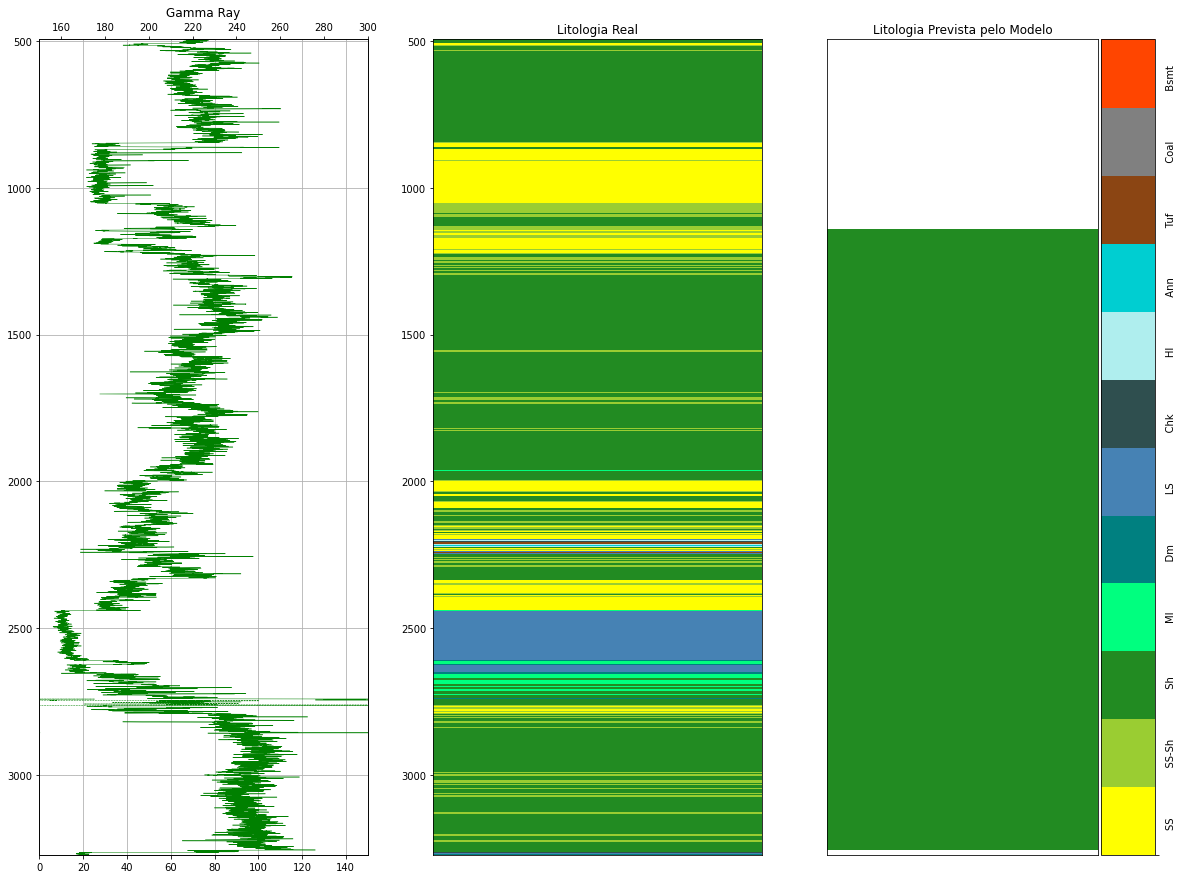

In [ ]:
plotarPredicao(numeroDoPocoPred.value - 1, dummy_model)

Devemos lembrar que na estratégia de separação, consideramos todo o conjunto de dados. Logo, alguns poços visualizados acima todos podem conter todo o seu trecho utilizado durante o treino. Isso implica não podermos usá-los como comparativo para avaliar visualmente a performance do nosso modelo. 

Assim, execute as duas células abaixo para observar somente os dados de teste e suas respectivas previsões, comparando litologia a litologia. Note ainda que essa visualização não reflete de forma alguma estratigrafia ou a disposição das litologias em um poço específico.

In [ ]:
numeroLito = widgets.IntSlider(min = 1, max = 12, step = 1,
                                 description = 'Litologia:')
print('Escolha um número entre 1 e 12 refere à litologia, para comparação:')
display(numeroLito)


Escolha um número entre 1 e 12 refere à litologia, para comparação:


IntSlider(value=1, description='Litologia:', max=12, min=1)

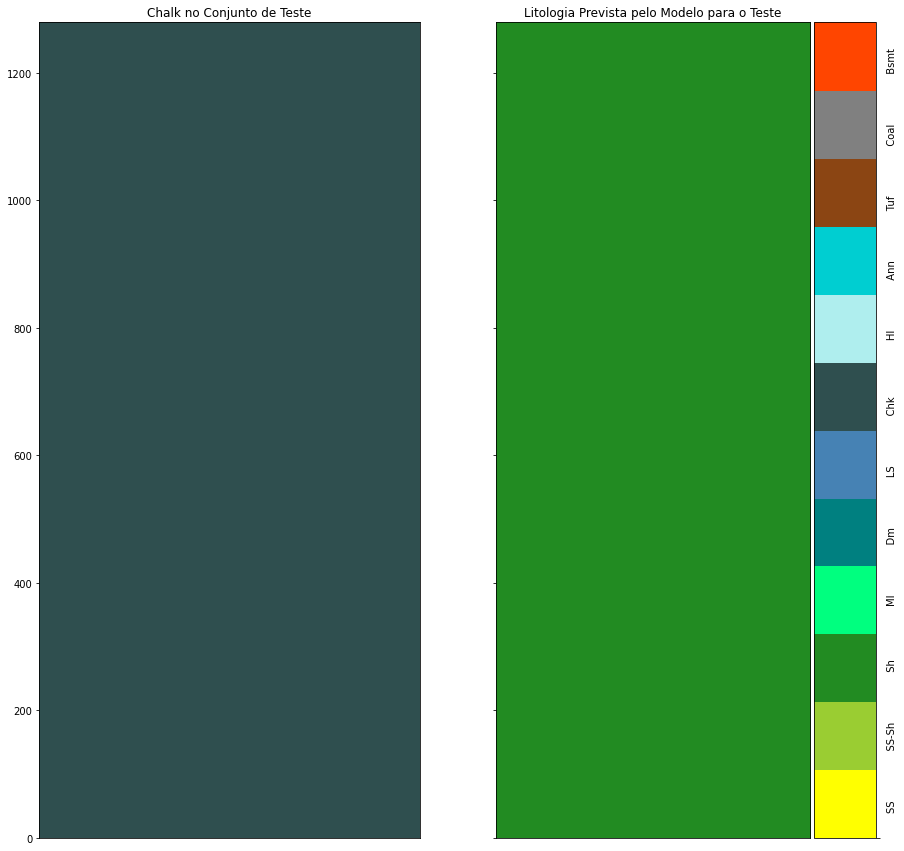

In [ ]:
plotarTeste(dummy_model, numeroLito.value - 1)

Vimos acima uma métrica numérica para avaliar a performance do nosso modelo: a acurácia. A acurácia compara o total de acertos com o número de exemplos na nosso conjunto de teste que está sendo avaliado através da fórmula:

<center> $ \frac {Total \: de \: acertos} {Total  \:  de  \:  exemplos}$ </center>

O problema dessa métrica é que ela avalia todas as classes/litologias ao mesmo tempo, mas não nos informa individualmente a eficiência de previsão de uma certa litologia. Por isso, é importante também utilizar as métricas Precisão, Recall e F1-Score, definidas do seguinte modo:

<center>
Precisão:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: verdadeiros}$

Recall:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: negativos}$

F1-Score:

$ 2 \cdot \frac {Precisao \:\cdot\: Recall} {Precisao \:+\: Recall}$

</center>

Quanto mais próximos de 1, melhor a eficiência de predição da litologia, e quanto mais próximo de 0, pior. Na dúvida, basta olhar para o F1-Score visto que o mesmo leva em consideração tanto precisão quanto recall para unificar as métricas.

In [ ]:
print(classification_report(yteste, dummy_model.predict(xteste),
                            target_names = lithology_keys.values()))

                 precision    recall  f1-score   support

      Sandstone       0.00      0.00      0.00     15695
Sandstone/Shale       0.00      0.00      0.00     12132
          Shale       0.60      1.00      0.75     56876
           Marl       0.00      0.00      0.00      2783
       Dolomite       0.00      0.00      0.00       157
      Limestone       0.00      0.00      0.00      4291
          Chalk       0.00      0.00      0.00      1279
         Halite       0.00      0.00      0.00         4
      Anhydrite       0.00      0.00      0.00        43
           Tuff       0.00      0.00      0.00       930
           Coal       0.00      0.00      0.00       535
       Basement       0.00      0.00      0.00        18

       accuracy                           0.60     94743
      macro avg       0.05      0.08      0.06     94743
   weighted avg       0.36      0.60      0.45     94743



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Uma outra forma de observar os resultados individualmente é a matriz de confusão. Execute a célula abaixo e vamos discutir o significado da matriz de confusão e como realizar sua leitura.

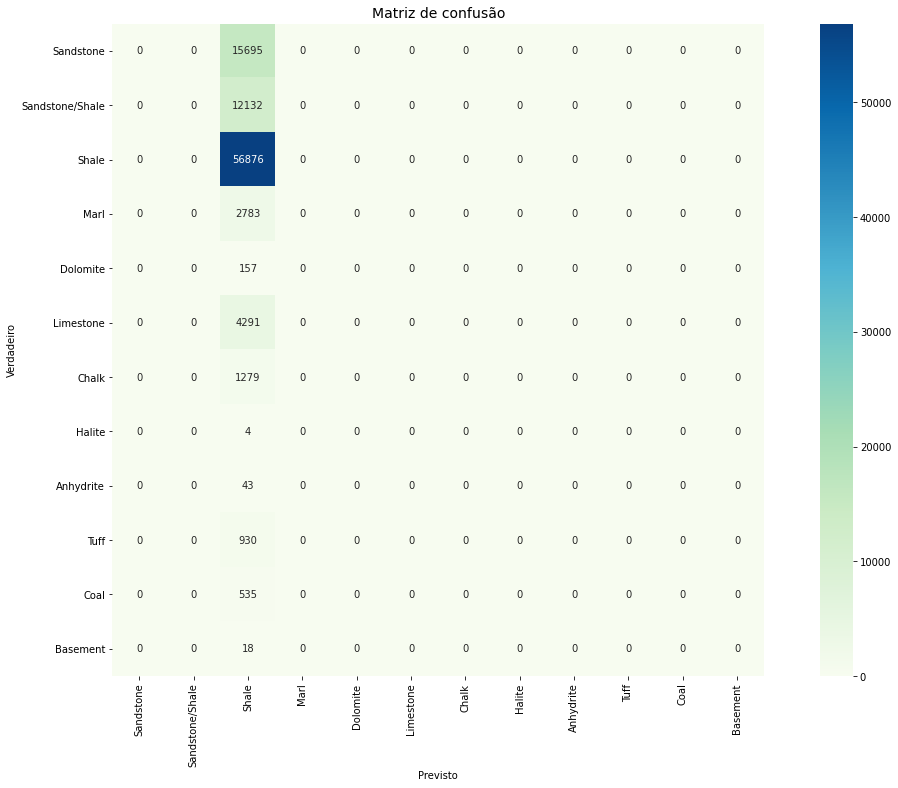

In [ ]:
confusionMatrix = confusion_matrix(yteste, dummy_model.predict(xteste))

fig, ax = plt.subplots(1, 1, figsize = (20 , 12))

sns.heatmap(confusionMatrix, cmap = 'GnBu', annot = True, square = True,
            ax = ax, fmt = 'g')
ax.set_xticklabels(list(lithology_keys.values()), rotation = 'vertical')
ax.set_yticklabels(list(lithology_keys.values()), rotation = 'horizontal')
ax.set_title('Matriz de confusão', fontsize = 14)
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro');

### Decision Trees (Árvores de Decisão)

[Árvores de decisão](https://scikit-learn.org/stable/modules/tree.html) é um método supervisionado que pode ser utilizado tanto para regressão quanto para classificação. Seu objetivo é criar um modelo que realiza predições a partir de regras simples.

As árvores de decisão requerem pouca preparação de dados. Para esse modelo, algumas fases, como normalização dos dados, não seriam necessárias, por exemplo. Também possui a vantagem de poder ser visualizada, e, consequentemente, interpretável.

Deve-se tomar cuidado para que as árvores geradas não se tornem complexas demais, de modo que o modelo criado não consiga generalizar bem para novos dados.

[Esse vídeo](https://www.youtube.com/watch?v=7VeUPuFGJHk&ab_channel=StatQuestwithJoshStarmer) apresenta um excelente resumo de como funciona uma árvore de decisão e como a mesma é criada. Vamos dar uma olhada e observar alguns pontos, como exemplos de árvores de decisão, a sua estrutura dentre outros.

Execute as duas células abaixo para realizar o treinamento. O tempo esperado de treino é de cerca de 30 segundos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Modifque aqui, com valores acima de 1 ou None:
max_depth = 10

tree_model = DecisionTreeClassifier(max_depth = max_depth, class_weight = 'balanced')

start = time.time()
tree_model.fit(xtreino, ytreino)
end = time.time()
print(f'Treino concluído. Tempo de treino {end - start} s')

Treino concluído. Tempo de treino 10.491230249404907 s


Após treinar a célula abaixo nos informará da acurácia do nosso modelo.

In [ ]:
score = tree_model.score(xteste, yteste)
print(f'O modelo treinado teve uma acurácia de {100*score:.2f}%')

O modelo treinado teve uma acurácia de 96.02%


As duas próximas células serão utilizadas para comparar as litologias reais nos poços com as previsões realizadas pelo modelo acima. Selecione um número entre 1 e 96 para ver o respectivo resultado para aquele poço.

In [ ]:
numeroDoPocoPred = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Número do poço')
print('Selecione abaixo o número do poço a ser previsto:')
display(numeroDoPocoPred)

Selecione abaixo o número do poço a ser previsto:


IntSlider(value=1, description='Número do poço', max=96, min=1)

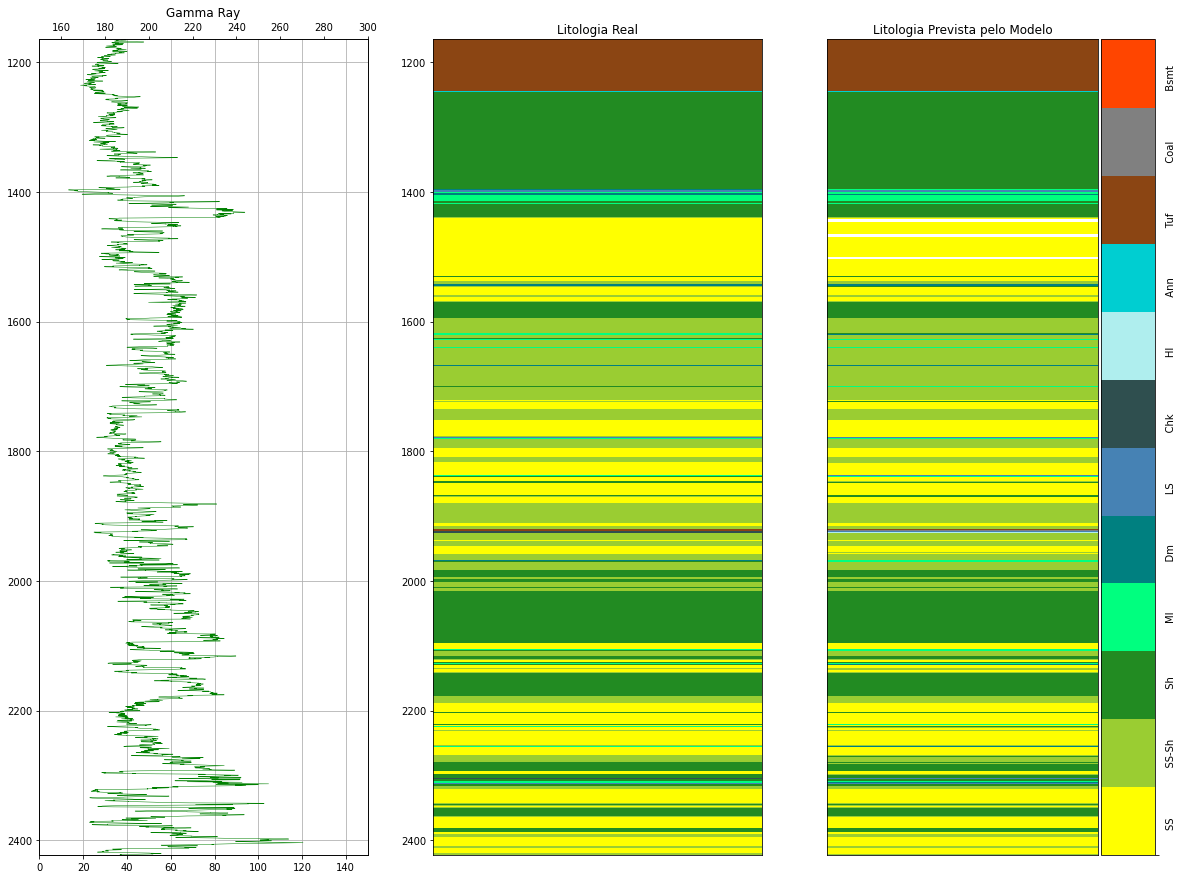

In [ ]:
plotarPredicao(numeroDoPocoPred.value - 1, tree_model)

Devemos lembrar que na estratégia de separação, consideramos todo o conjunto de dados. Logo, alguns poços visualizados acima todos podem conter todo o seu trecho utilizado durante o treino. Isso implica não podermos usá-los como comparativo para avaliar visualmente a performance do nosso modelo. 

Assim, execute as duas células abaixo para observar somente os dados de teste e suas respectivas previsões, comparando litologia a litologia. Note ainda que essa visualização não reflete de forma alguma estratigrafia ou a disposição das litologias em um poço específico.

In [ ]:
numeroLito = widgets.IntSlider(min = 1, max = 12, step = 1,
                                 description = 'Litologia:')
print('Escolha um número entre 1 e 12 refere à litologia, para comparação:')
display(numeroLito)

Escolha um número entre 1 e 12 refere à litologia, para comparação:


IntSlider(value=1, description='Litologia:', max=12, min=1)

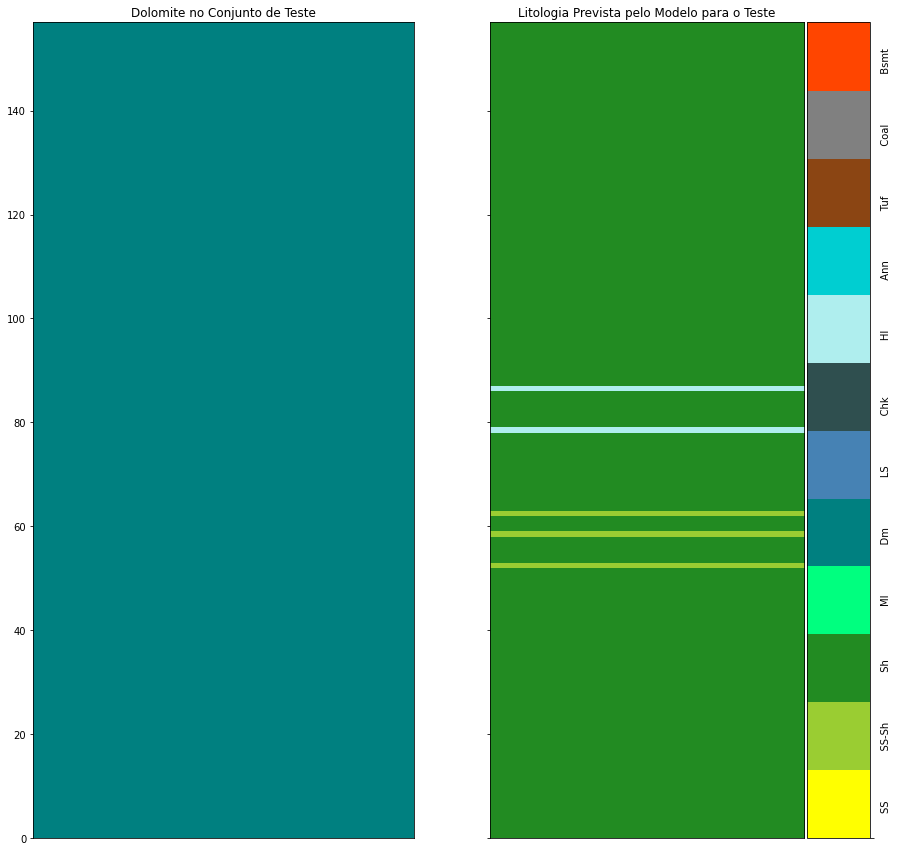

In [ ]:
plotarTeste(tree_model, numeroLito.value - 1)

Vimos acima uma métrica numérica para avaliar a performance do nosso modelo: a acurácia. A acurácia compara o total de acertos com o número de exemplos na nosso conjunto de teste que está sendo avaliado através da fórmula:

<center> $ \frac {Total \: de \: acertos} {Total  \:  de  \:  exemplos}$ </center>

O problema dessa métrica é que ela avalia todas as classes/litologias ao mesmo tempo, mas não nos informa individualmente a eficiência de previsão de uma certa litologia. Por isso, é importante também utilizar as métricas Precisão, Recall e F1-Score, definidas do seguinte modo:

<center>
Precisão:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: verdadeiros}$

Recall:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: negativos}$

F1-Score:

$ 2 \cdot \frac {Precisao \:\cdot\: Recall} {Precisao \:+\: Recall}$

</center>

Quanto mais próximos de 1, melhor a eficiência de predição da litologia, e quanto mais próximo de 0, pior. Na dúvida, basta olhar para o F1-Score visto que o mesmo leva em consideração tanto precisão quanto recall para unificar as métricas.

In [ ]:
print(classification_report(yteste, tree_model.predict(xteste),
                            target_names = lithology_keys.values()))

                 precision    recall  f1-score   support

      Sandstone       0.96      0.92      0.94     15695
Sandstone/Shale       0.93      0.93      0.93     12132
          Shale       0.98      0.98      0.98     56876
           Marl       0.95      0.95      0.95      2783
       Dolomite       0.00      0.00      0.00       157
      Limestone       0.92      0.92      0.92      4291
          Chalk       0.98      0.99      0.98      1279
         Halite       0.01      1.00      0.01         4
      Anhydrite       1.00      0.91      0.95        43
           Tuff       0.97      0.98      0.97       930
           Coal       0.89      0.90      0.90       535
       Basement       1.00      1.00      1.00        18

       accuracy                           0.96     94743
      macro avg       0.80      0.87      0.80     94743
   weighted avg       0.96      0.96      0.96     94743



Uma outra forma de observar os resultados individualmente é a matriz de confusão. Execute a célula abaixo e vamos discutir o significado da matriz de confusão e como realizar sua leitura.

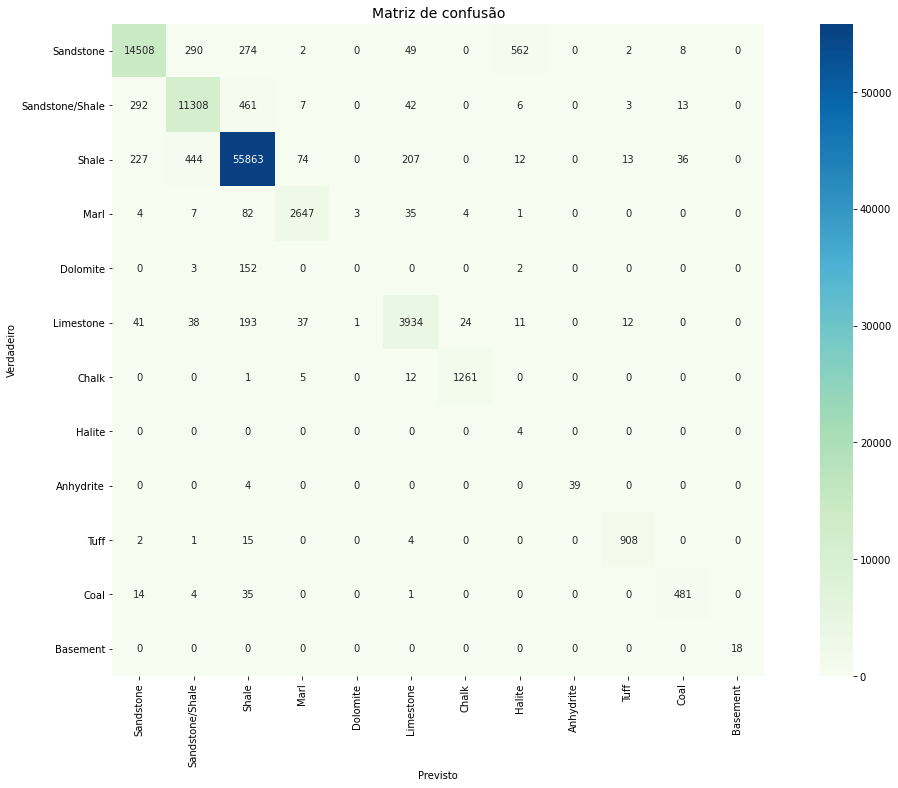

In [ ]:
confusionMatrix = confusion_matrix(yteste, tree_model.predict(xteste))

fig, ax = plt.subplots(1, 1, figsize = (20 , 12))

sns.heatmap(confusionMatrix, cmap = 'GnBu', annot = True, square = True,
            ax = ax, fmt = 'g')
ax.set_xticklabels(list(lithology_keys.values()), rotation = 'vertical')
ax.set_yticklabels(list(lithology_keys.values()), rotation = 'horizontal')
ax.set_title('Matriz de confusão', fontsize = 14)
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro');

Esse modelo nos permite obter uma medida da importância de cada variável para realizar a previsão da litologia. Execute a célula abaixo para gerar um gráfico que nos irá mostrar essas informações.

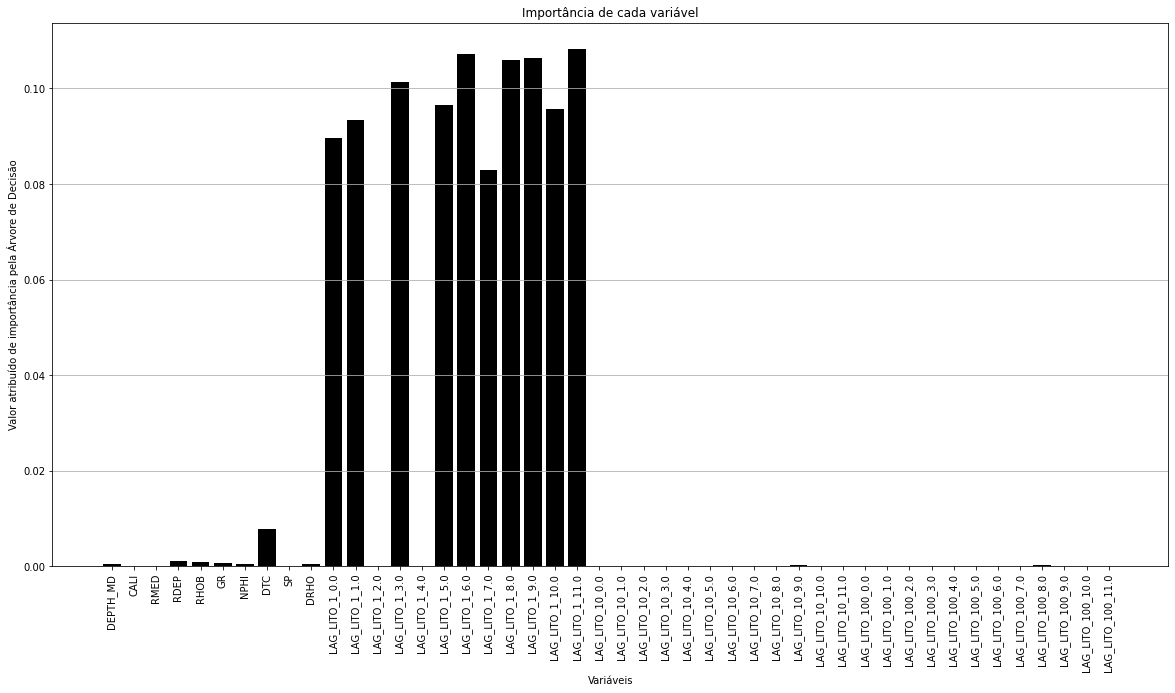

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

feature_importances = tree_model.feature_importances_

ax.bar(range(1, len(feature_names) + 1), height = feature_importances, color = 'k');
ax.grid(axis = 'y')

ax.set_title('Importância de cada variável');
ax.set_ylabel('Valor atribuído de importância pela Árvore de Decisão')
ax.set_xticks(range(1, len(feature_names) + 1))
ax.set_xticklabels(feature_names, rotation = 'vertical')
ax.set_xlabel('Variáveis');

Em particular, o modelo Árvores de Decisão pode ser interpretável. O código abaixo nos mostra a árvore de decisão criada para realizar as previsões. Caso a profundidade da árvore seja muito grande, dificilmente iremos conseguir ver nitidamente a imagem gerada. Para entender esse conceito, sugiro modificar o tamanho da árvore para um numéro pequeno (menor que 5, por exemplo) e só depois executar a célula abaixo. Evite executar a célula caso o tamanho da árvore seja grande.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (30, 30))

class_names = list(lithology_keys.values())

plot_tree(tree_model,
          filled = True,
          class_names = class_names,
          feature_names = feature_names,
          ax = ax);

Error in callback <function flush_figures at 0x7fc055b5d3b0> (for post_execute):


KeyboardInterrupt: ignored

### Random Forest (Florestas Aleatórias)

As [Florestas Aleatórias ou Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) pertencem ao grupo de métodos <i>ensemble</i>. Esses métodos possuem a característica de combinar vários preditores como base para realizar sua predição, com o objetivo de aumentar a capacidade de generalização e a robustez das previsões. Nesse caso, em específico uma Random Forest é formada por diversas árvores de decisão. Vamos entender um pouco mais sobre esse método abaixo.

Em uma floresta aleatória, cada árvore precisa ser diferente da outra, do contrário todas as árvores fariam exatamente a mesma predição e não faria sentido combinar várias árvores, pois bastaria somente uma. Por isso, existe uma 'aleatoriedade' na construção de cada árvore. Essa aleatoridade ocorre em dois momentos principais:

*   O conjunto de dados inteiro não é utilizado, sendo selecionado aleatoriamente apenas parte do mesmo para a construção de árvore;
*   No momento de escolher a raíz da árvore, e cada nó interno, as opções são limitadas através de uma escolha aleatória dentre as possíveis variáveis preditoras existentes no dataset.

Após construir todas as árvores, no momento da predição no final cada árvore irá ter o seu voto. Desse modo, a classe (litologia) que obtiver mais votos será a escolhida.

[Vamos observar esse video](https://www.youtube.com/watch?v=7VeUPuFGJHk&ab_channel=StatQuestwithJoshStarmer) para entender como são construídas as Florestas Aleatórias.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Escolher profundidade e número de estimadores

rf = RandomForestClassifier(n_estimators = 100,
                            criterion = 'gini',
                            max_depth = None,
                            class_weight = 'balanced',
                            )

In [ ]:
start = time.time()
rf.fit(xtreino, ytreino)
end = time.time()
print(f'Treino concluído. Tempo de treino {(end - start):.2f} s')

Treino concluído. Tempo de treino 230.47 s


Após treinar a célula abaixo nos informará da acurácia do nosso modelo.

In [ ]:
score = rf.score(xteste, yteste)
print(f'O modelo treinado teve uma acurácia de {100*score:.2f}%')

O modelo treinado teve uma acurácia de 96.62%


As duas próximas células serão utilizadas para comparar as litologias reais nos poços com as previsões realizadas pelo modelo acima. Selecione um número entre 1 e 96 para ver o respectivo resultado para aquele poço.

In [ ]:
numeroDoPocoPred = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Número do poço')
print('Selecione abaixo o número do poço a ser previsto:')
display(numeroDoPocoPred)

Selecione abaixo o número do poço a ser previsto:


IntSlider(value=1, description='Número do poço', max=96, min=1)

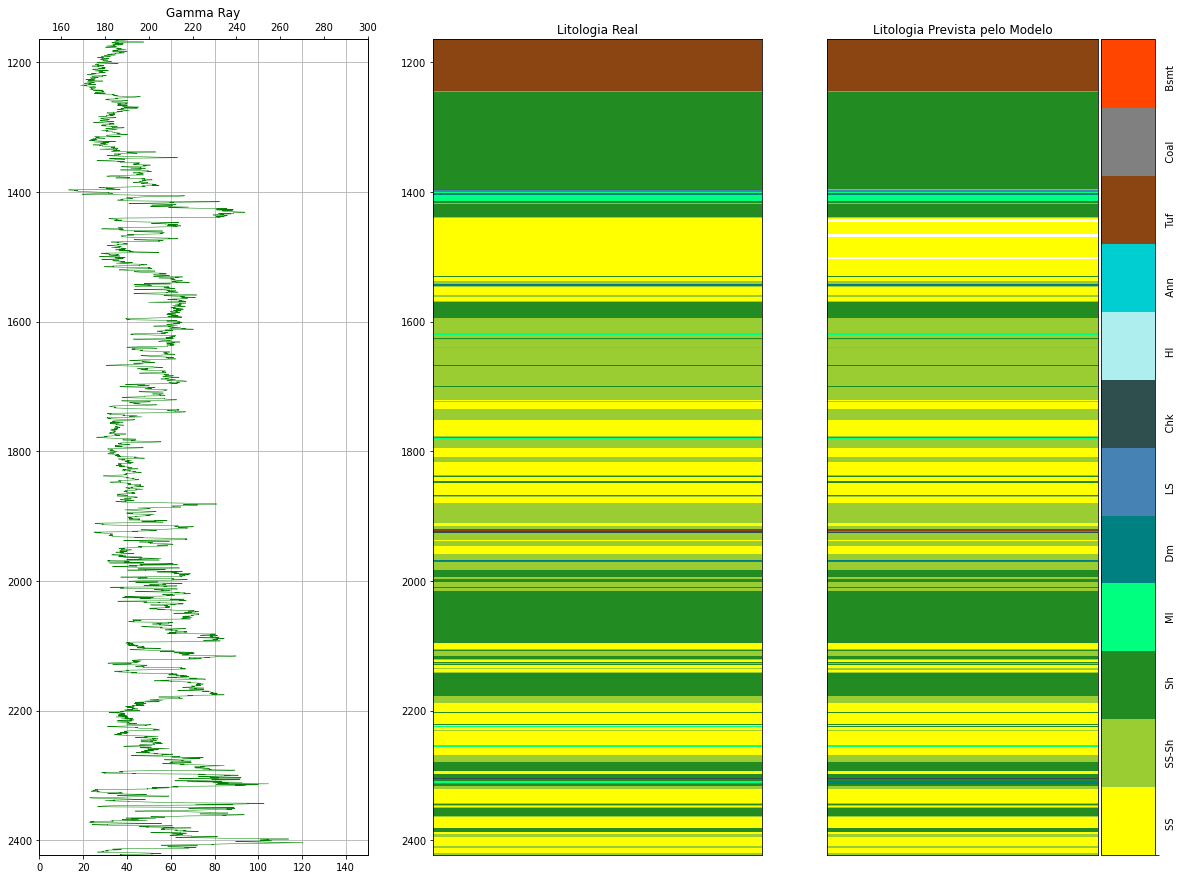

In [ ]:
plotarPredicao(numeroDoPocoPred.value - 1, rf)

Devemos lembrar que na estratégia de separação, consideramos todo o conjunto de dados. Logo, alguns poços visualizados acima todos podem conter todo o seu trecho utilizado durante o treino. Isso implica não podermos usá-los como comparativo para avaliar visualmente a performance do nosso modelo. 

Assim, execute as duas células abaixo para observar somente os dados de teste e suas respectivas previsões, comparando litologia a litologia. Note ainda que essa visualização não reflete de forma alguma estratigrafia ou a disposição das litologias em um poço específico.

In [ ]:
numeroLito = widgets.IntSlider(min = 1, max = 12, step = 1,
                                 description = 'Litologia:')
print('Escolha um número entre 1 e 12 refere à litologia, para comparação:')
display(numeroLito)

Escolha um número entre 1 e 12 refere à litologia, para comparação:


IntSlider(value=1, description='Litologia:', max=12, min=1)

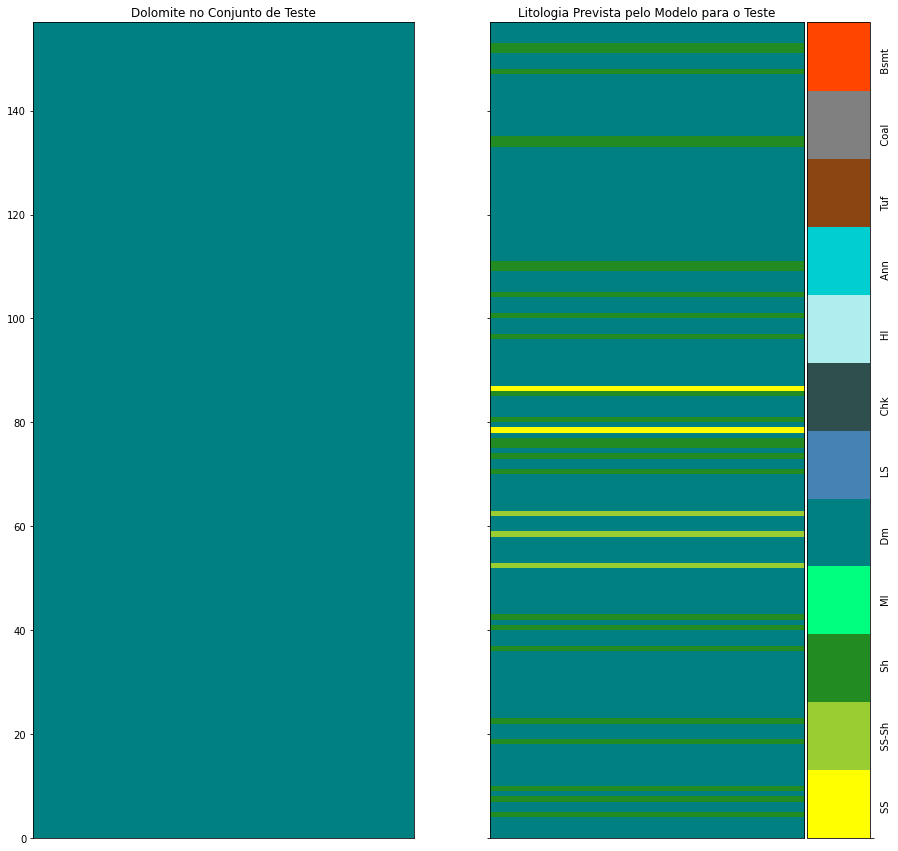

In [ ]:
plotarTeste(rf, numeroLito.value - 1)

Vimos acima uma métrica numérica para avaliar a performance do nosso modelo: a acurácia. A acurácia compara o total de acertos com o número de exemplos na nosso conjunto de teste que está sendo avaliado através da fórmula:

<center> $ \frac {Total \: de \: acertos} {Total  \:  de  \:  exemplos}$ </center>

O problema dessa métrica é que ela avalia todas as classes/litologias ao mesmo tempo, mas não nos informa individualmente a eficiência de previsão de uma certa litologia. Por isso, é importante também utilizar as métricas Precisão, Recall e F1-Score, definidas do seguinte modo:

<center>
Precisão:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: verdadeiros}$

Recall:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: negativos}$

F1-Score:

$ 2 \cdot \frac {Precisao \:\cdot\: Recall} {Precisao \:+\: Recall}$

</center>

Quanto mais próximos de 1, melhor a eficiência de predição da litologia, e quanto mais próximo de 0, pior. Na dúvida, basta olhar para o F1-Score visto que o mesmo leva em consideração tanto precisão quanto recall para unificar as métricas.

In [ ]:
print(classification_report(yteste, rf.predict(xteste),
                            target_names = lithology_keys.values()))

                 precision    recall  f1-score   support

      Sandstone       0.96      0.96      0.96     15695
Sandstone/Shale       0.93      0.93      0.93     12132
          Shale       0.98      0.98      0.98     56876
           Marl       0.95      0.95      0.95      2783
       Dolomite       0.79      0.82      0.80       157
      Limestone       0.92      0.91      0.91      4291
          Chalk       0.98      0.98      0.98      1279
         Halite       1.00      1.00      1.00         4
      Anhydrite       1.00      0.91      0.95        43
           Tuff       0.97      0.97      0.97       930
           Coal       0.90      0.89      0.89       535
       Basement       1.00      1.00      1.00        18

       accuracy                           0.97     94743
      macro avg       0.95      0.94      0.94     94743
   weighted avg       0.97      0.97      0.97     94743



Uma outra forma de observar os resultados individualmente é a matriz de confusão. Execute a célula abaixo e vamos discutir o significado da matriz de confusão e como realizar sua leitura.

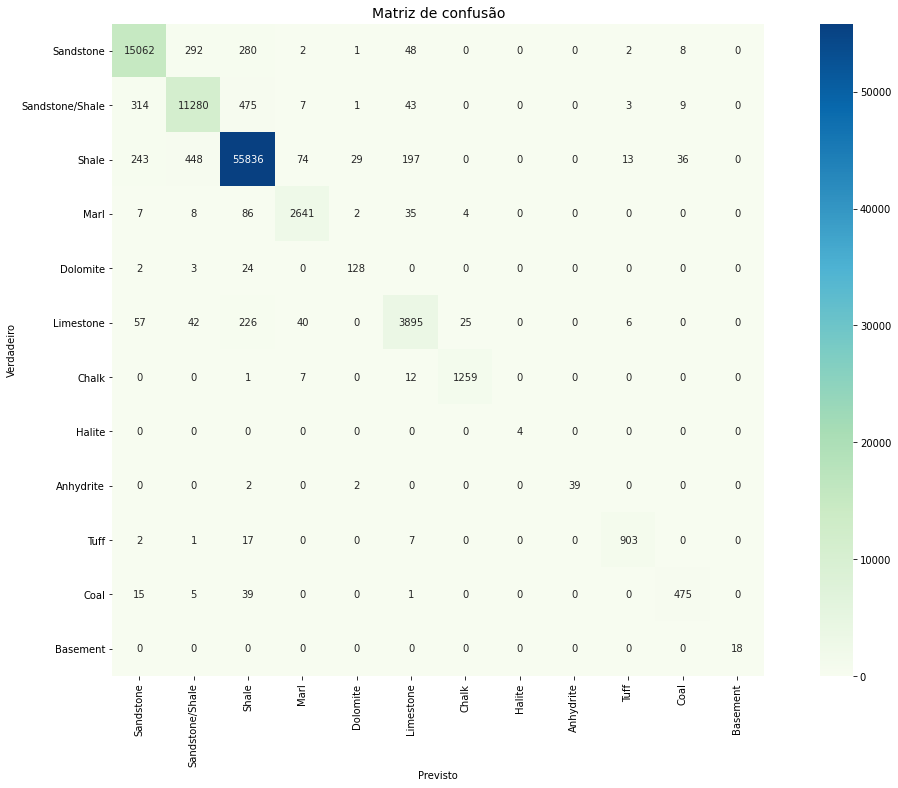

In [ ]:
confusionMatrix = confusion_matrix(yteste, rf.predict(xteste))

fig, ax = plt.subplots(1, 1, figsize = (20 , 12))

sns.heatmap(confusionMatrix, cmap = 'GnBu', annot = True, square = True,
            ax = ax, fmt = 'g')
ax.set_xticklabels(list(lithology_keys.values()), rotation = 'vertical')
ax.set_yticklabels(list(lithology_keys.values()), rotation = 'horizontal')
ax.set_title('Matriz de confusão', fontsize = 14)
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro');

Esse modelo nos permite obter uma medida da importância de cada variável para realizar a previsão da litologia. Execute a célula abaixo para gerar um gráfico que nos irá mostrar essas informações.

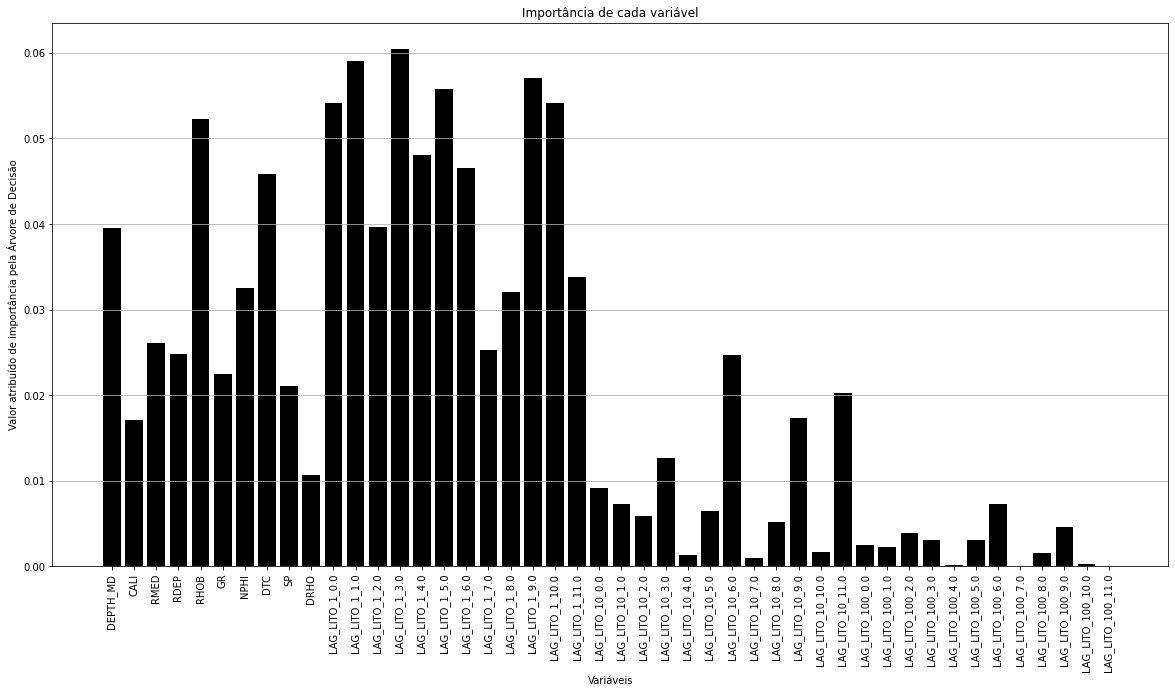

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

feature_importances = rf.feature_importances_

ax.bar(range(1, len(feature_names) + 1), height = feature_importances, color = 'k');
ax.grid(axis = 'y')

ax.set_title('Importância de cada variável');
ax.set_ylabel('Valor atribuído de importância pela Árvore de Decisão')
ax.set_xticks(range(1, len(feature_names) + 1))
ax.set_xticklabels(feature_names, rotation = 'vertical')
ax.set_xlabel('Variáveis');

### AdaBoost

[AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost) também pertence aos métdos de <i>ensemble</i>, porém seu funcionamento diferente de Random Forests. A ideia principal por trás desse método é ajustar uma sequência de preditores fracos em versões repetidas dos dados modificados. As predições feitas por cada preditor são, então, combinadas através de um peso, diferentemente de Random Forests onde todas as árvores possuem o mesmo peso.

Inicialmente, o peso é igual para todas as árvores, porém eles são modificados sucessivamente, de modo que exemplos incorretamente previstos passam a ter um peso maior. Isso força com que cada preditor fraco subsequente passe a focar em exemplos que foram incorretamente classificados pelos preditores anteriores.

[Vamos observar esse video](https://www.youtube.com/watch?v=LsK-xG1cLYA) para entender como é construído o modelo AdaBoost.

Em seguida, execute as células abaixo para realizar o treinamento do modelo.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10,
                                                                class_weight = 'balanced'),
                        n_estimators = 150,)

In [ ]:
start = time.time()
ab.fit(xtreino, ytreino)
end = time.time()
print(f'Tempo de treino {end - start} s')

Tempo de treino 1580.699717283249 s


Após treinar a célula abaixo nos informará da acurácia do nosso modelo.

In [ ]:
score = ab.score(xteste, yteste)
print(f'O modelo treinado teve uma acurácia de {100*score:.2f}%')

O modelo treinado teve uma acurácia de 93.17%


As duas próximas células serão utilizadas para comparar as litologias reais nos poços com as previsões realizadas pelo modelo acima. Selecione um número entre 1 e 96 para ver o respectivo resultado para aquele poço.

In [ ]:
numeroDoPocoPred = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Número do poço')
print('Selecione abaixo o número do poço a ser previsto:')
display(numeroDoPocoPred)

In [ ]:
plotarPredicao(numeroDoPocoPred.value - 1, ab)

Devemos lembrar que na estratégia de separação, consideramos todo o conjunto de dados. Logo, alguns poços visualizados acima todos podem conter todo o seu trecho utilizado durante o treino. Isso implica não podermos usá-los como comparativo para avaliar visualmente a performance do nosso modelo. 

Assim, execute as duas células abaixo para observar somente os dados de teste e suas respectivas previsões, comparando litologia a litologia. Note ainda que essa visualização não reflete de forma alguma estratigrafia ou a disposição das litologias em um poço específico.

In [ ]:
numeroLito = widgets.IntSlider(min = 1, max = 12, step = 1,
                                 description = 'Litologia:')
print('Escolha um número entre 1 e 12 refere à litologia, para comparação:')
display(numeroLito)

Escolha um número entre 1 e 12 refere à litologia, para comparação:


IntSlider(value=1, description='Litologia:', max=12, min=1)

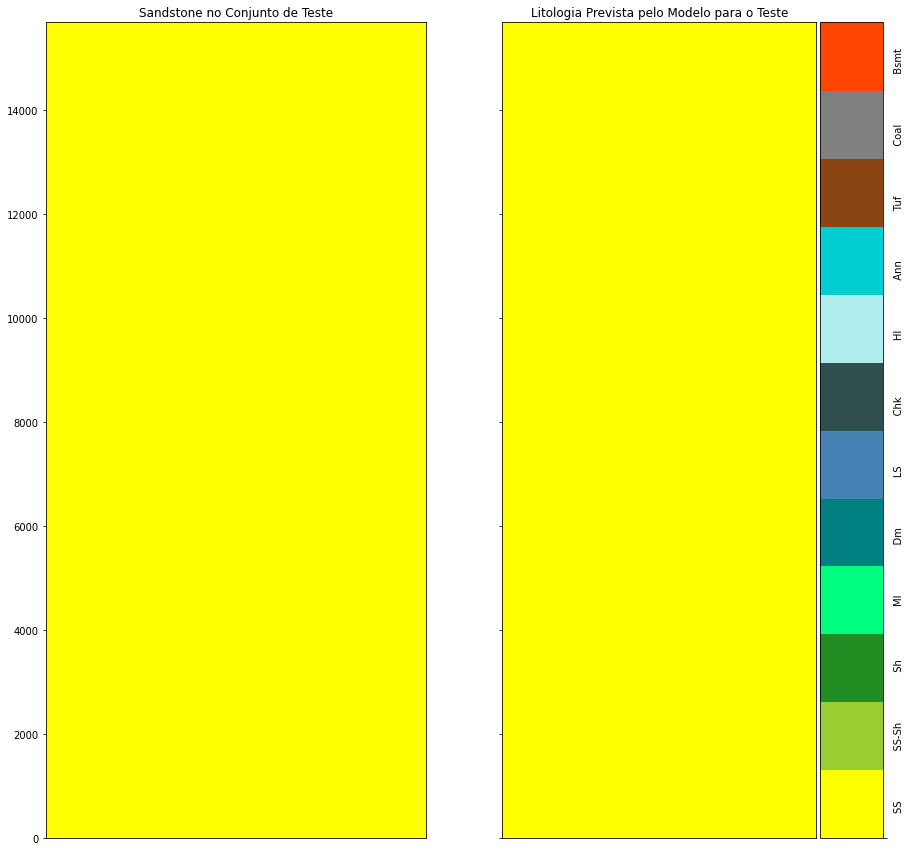

In [ ]:
plotarTeste(ab, numeroLito.value - 1)

Vimos acima uma métrica numérica para avaliar a performance do nosso modelo: a acurácia. A acurácia compara o total de acertos com o número de exemplos na nosso conjunto de teste que está sendo avaliado através da fórmula:

<center> $ \frac {Total \: de \: acertos} {Total  \:  de  \:  exemplos}$ </center>

O problema dessa métrica é que ela avalia todas as classes/litologias ao mesmo tempo, mas não nos informa individualmente a eficiência de previsão de uma certa litologia. Por isso, é importante também utilizar as métricas Precisão, Recall e F1-Score, definidas do seguinte modo:

<center>
Precisão:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: verdadeiros}$

Recall:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: negativos}$

F1-Score:

$ 2 \cdot \frac {Precisao \:\cdot\: Recall} {Precisao \:+\: Recall}$

</center>

Quanto mais próximos de 1, melhor a eficiência de predição da litologia, e quanto mais próximo de 0, pior. Na dúvida, basta olhar para o F1-Score visto que o mesmo leva em consideração tanto precisão quanto recall para unificar as métricas.

In [ ]:
print(classification_report(yteste, ab.predict(xteste),
                            target_names = lithology_keys.values()))

                 precision    recall  f1-score   support

      Sandstone       0.91      0.92      0.92     15695
Sandstone/Shale       0.83      0.83      0.83     12132
          Shale       0.96      0.96      0.96     56876
           Marl       0.95      0.91      0.93      2783
       Dolomite       0.87      0.69      0.77       157
      Limestone       0.92      0.87      0.89      4291
          Chalk       0.97      0.98      0.98      1279
         Halite       1.00      0.75      0.86         4
      Anhydrite       1.00      0.91      0.95        43
           Tuff       0.97      0.96      0.96       930
           Coal       0.90      0.87      0.88       535
       Basement       1.00      1.00      1.00        18

       accuracy                           0.93     94743
      macro avg       0.94      0.89      0.91     94743
   weighted avg       0.93      0.93      0.93     94743



Uma outra forma de observar os resultados individualmente é a matriz de confusão. Execute a célula abaixo e vamos discutir o significado da matriz de confusão e como realizar sua leitura.

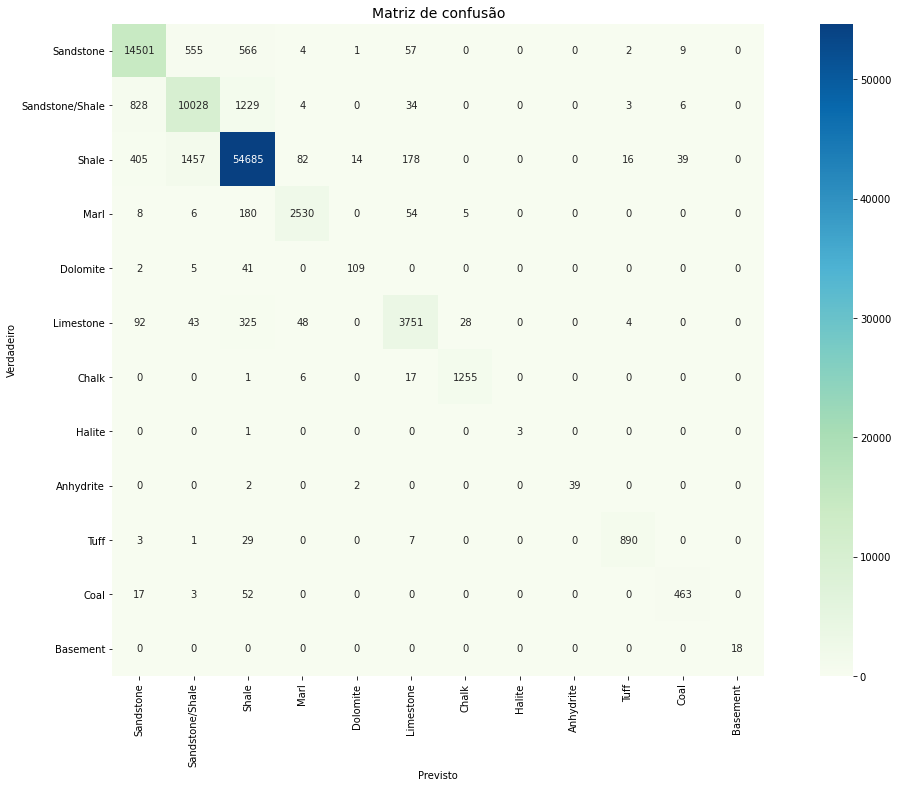

In [ ]:
confusionMatrix = confusion_matrix(yteste, ab.predict(xteste))

fig, ax = plt.subplots(1, 1, figsize = (20 , 12))

sns.heatmap(confusionMatrix, cmap = 'GnBu', annot = True, square = True,
            ax = ax, fmt = 'g')
ax.set_xticklabels(list(lithology_keys.values()), rotation = 'vertical')
ax.set_yticklabels(list(lithology_keys.values()), rotation = 'horizontal')
ax.set_title('Matriz de confusão', fontsize = 14)
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro');

Esse modelo nos permite obter uma medida da importância de cada variável para realizar a previsão da litologia. Execute a célula abaixo para gerar um gráfico que nos irá mostrar essas informações.

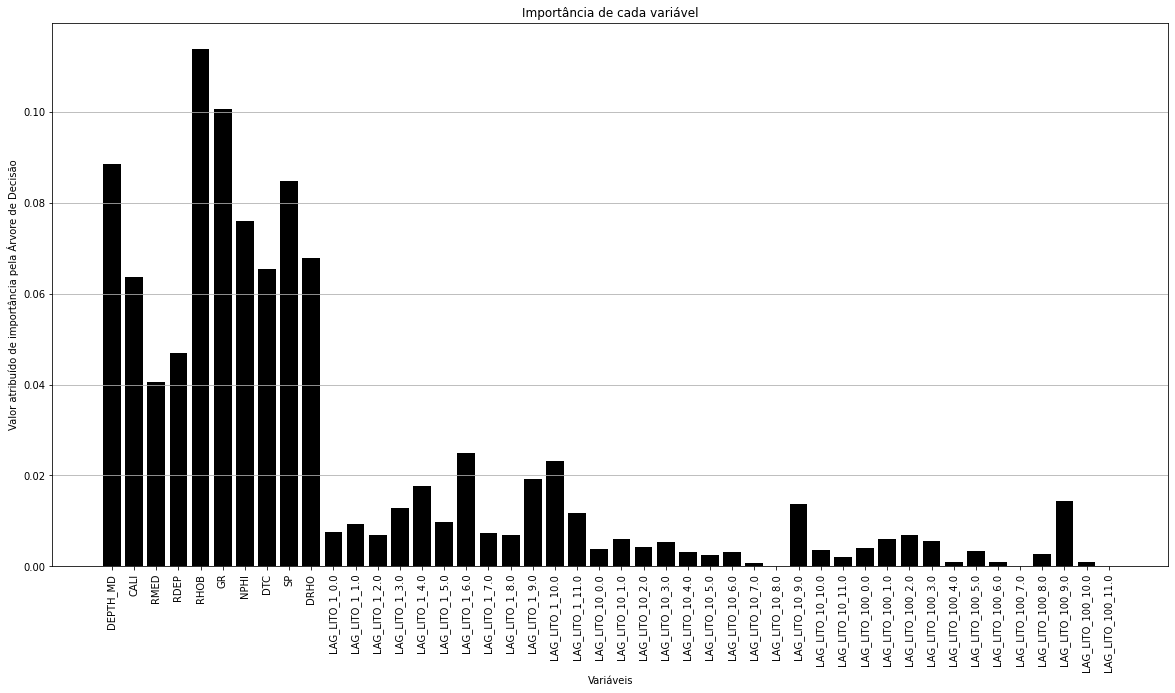

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

feature_importances = ab.feature_importances_

ax.bar(range(1, len(feature_names) + 1), height = feature_importances, color = 'k');
ax.grid(axis = 'y')

ax.set_title('Importância de cada variável');
ax.set_ylabel('Valor atribuído de importância pela Árvore de Decisão')
ax.set_xticks(range(1, len(feature_names) + 1))
ax.set_xticklabels(feature_names, rotation = 'vertical')
ax.set_xlabel('Variáveis');

### Logistic Regression (Regressão Logística)

Apesar do seu nome, a regressão logística serve para resolver problemas de classificação. Nesse modelo a saída será um valor variando entre 0 a 1, que indica a probabilidade de determinadas features/variáveis preditoras se referirem a uma certa classe, quando comparada com as demais.


<center> 
A saída esperada será similar à figura abaixo:
</center> 
<figure>
<center>
<img src='https://developers.google.com/machine-learning/crash-course/images/LogisticRegressionOutput.svg' />
<figcaption> O valor de saída ficará entre 0 e 1, indicando a probabilidade de pertencer àquela classe [4]. </figcaption></center>
</figure>

[Observemos esse vídeo](https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer) para entender um pouco mais sobre a ideia por trás desse método.

Em seguida, execute as células abaixo para treinar o modelo de Regressão Logística.

[[4] - Referência da figura](https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
max_iter = 100

lr = LogisticRegression(max_iter = max_iter)
start = time.time()
lr.fit(xtreino, ytreino)
end = time.time()
print(f'Treino concluído. Tempo de treino {end - start} s')
 # Configurar max_iter # Pontuar que quanto mais iterações, mais tempo necessário para treinar, ex 10.000 demora muito

Treino concluído. Tempo de treino 52.47626519203186 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Após treinar a célula abaixo nos informará da acurácia do nosso modelo.

In [ ]:
score = lr.score(xteste, yteste)
print(f'O modelo treinado teve uma acurácia de {100*score:.2f}%')

O modelo treinado teve uma acurácia de 96.72%


As duas próximas células serão utilizadas para comparar as litologias reais nos poços com as previsões realizadas pelo modelo acima. Selecione um número entre 1 e 96 para ver o respectivo resultado para aquele poço.

In [ ]:
numeroDoPocoPred = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Número do poço')
print('Selecione abaixo o número do poço a ser previsto:')
display(numeroDoPocoPred)

Selecione abaixo o número do poço a ser previsto:


IntSlider(value=1, description='Número do poço', max=96, min=1)

In [ ]:
plotarPredicao(numeroDoPocoPred.value - 1, lr)

Devemos lembrar que na estratégia de separação, consideramos todo o conjunto de dados. Logo, alguns poços visualizados acima todos podem conter todo o seu trecho utilizado durante o treino. Isso implica não podermos usá-los como comparativo para avaliar visualmente a performance do nosso modelo. 

Assim, execute as duas células abaixo para observar somente os dados de teste e suas respectivas previsões, comparando litologia a litologia. Note ainda que essa visualização não reflete de forma alguma estratigrafia ou a disposição das litologias em um poço específico.

In [ ]:
numeroLito = widgets.IntSlider(min = 1, max = 12, step = 1,
                                 description = 'Litologia:')
print('Escolha um número entre 1 e 12 refere à litologia, para comparação:')
display(numeroLito)

In [ ]:
plotarTeste(lr, numeroLito.value - 1)

Vimos acima uma métrica numérica para avaliar a performance do nosso modelo: a acurácia. A acurácia compara o total de acertos com o número de exemplos na nosso conjunto de teste que está sendo avaliado através da fórmula:

<center> $ \frac {Total \: de \: acertos} {Total  \:  de  \:  exemplos}$ </center>

O problema dessa métrica é que ela avalia todas as classes/litologias ao mesmo tempo, mas não nos informa individualmente a eficiência de previsão de uma certa litologia. Por isso, é importante também utilizar as métricas Precisão, Recall e F1-Score, definidas do seguinte modo:

<center>
Precisão:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: verdadeiros}$

Recall:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: negativos}$

F1-Score:

$ 2 \cdot \frac {Precisao \:\cdot\: Recall} {Precisao \:+\: Recall}$

</center>

Quanto mais próximos de 1, melhor a eficiência de predição da litologia, e quanto mais próximo de 0, pior. Na dúvida, basta olhar para o F1-Score visto que o mesmo leva em consideração tanto precisão quanto recall para unificar as métricas.

In [ ]:
print(classification_report(yteste, lr.predict(xteste),
                            target_names = lithology_keys.values()))

Uma outra forma de observar os resultados individualmente é a matriz de confusão. Execute a célula abaixo e vamos discutir o significado da matriz de confusão e como realizar sua leitura.

In [ ]:
confusionMatrix = confusion_matrix(yteste, lr.predict(xteste))

fig, ax = plt.subplots(1, 1, figsize = (20 , 12))

sns.heatmap(confusionMatrix, cmap = 'GnBu', annot = True, square = True,
            ax = ax, fmt = 'g')
ax.set_xticklabels(list(lithology_keys.values()), rotation = 'vertical')
ax.set_yticklabels(list(lithology_keys.values()), rotation = 'horizontal')
ax.set_title('Matriz de confusão', fontsize = 14)
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro');

### Redes Neurais: MLP

As redes neurais são algoritmos de Machine Learning inspirados no funcionamento dos neurônios e a interconectividade entre os mesmos no cérebro humano. A sua unidade fundamental é o perceptron, como visto na figura abaixo:

<center> 
O perceptron, unidade fundamental em uma rede neural:
<figure>
<img src='https://miro.medium.com/max/510/1*7pwA1DjBw6JDkwZQecUNiw.png' />
<figcaption> Para obter o valor de saída (y), cada valor de entrada Xi é multiplicado por um peso Wi [5]. </figcaption>
</center> 
</figure>

A ideia por trás disso não é nova, mas remonta à decada de 1940. Com o avanço computacional foi possível criar estruturas mais complexas, surgindo então o Multi Layer Perceptron (MLP). Veja abaixo sua estrutura e seus componentes.

<center> 
A estrutura de uma rede neural pode ser esquematizada como abaixo:
</center> 
<figure>
<center>
<img src='https://developers.google.com/machine-learning/crash-course/images/1hidden.svg' />
<figcaption> Rede neural com um hidden layer, com três neurônios cada [6]. </figcaption>
<img src='https://developers.google.com/machine-learning/crash-course/images/2hidden.svg' />
<figcaption> Rede neural com dois hidden layers, com três neurônios cada. Estamos transicionando para Deep Learning nesse caso. [6]. </figcaption></center>
</figure>

As redes neurais possuem duas fases principais:
* Forward Propagation: durante essa fase os valores de entrada (nossas variáveis preditoras) serão multiplicadas pelos seus respectivos pesos, e em seguida passada por uma função de ativação em cada neurônio. Isso se repete para as demais camadas e neurônios da rede, até chegarmos no valor de saída (output);
* [Back Propagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U&ab_channel=3Blue1Brown): durante essa fase a rede neural irá calcular uma função chamada função de custo que vai nos informar o quanto a rede neural errou em suas previsões. A partir desse valor, a rede neural irá reajustar os pesos utilizados, buscando minimizar esse erro, e consequentemente, a função de custo. Pode-se entender que a parte ativa do aprendizado nesse algoritmo ocorre nessa fase.

[Vamos observar através desse link](https://playground.tensorflow.org/) alguns conceitos relativos a redes neurais antes de realizarmos o nosso treinamento.

[[5] - Referência da figura](https://towardsdatascience.com/the-perceptron-3af34c84838c)

[[6] - Referência da figura](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/anatomy)

Execute a célula abaixo para criar uma função que irá nos ajudar a construir o nosso modelo de rede neural.

In [24]:
def construirModeloNN(neuronios = 16,
                      numeroDeCamadas = 0,
                      neuronios2 = 32,                      
                      saida = 1):
  
  modelo = Sequential()

  modelo.add(Dense(neuronios,
                   activation = 'relu',
                   input_shape = (xtreino.shape[-1], )
                   ))
  #modelo.add(Dropout(rate = 0.2))
  
  for i in range(numeroDeCamadas):
    modelo.add(Dense(neuronios2,
                   activation = 'relu',
                   ))
  
  modelo.add(Dense(saida,
                   activation = 'softmax'))
  
  modelo.compile(loss = 'categorical_crossentropy',
                 optimizer = 'Adam',
                 metrics = ['categorical_accuracy'])

  return modelo

Execute a célula abaixo para escolher o número de camadas ocultas adicionais, o número de neurônios na primeira camada, e o número de neurônios nas camadas adicionais.

In [25]:
modeloWidget = interactive(construirModeloNN,
                           neuronios = widgets.IntSlider(min = 4, max = 256,
                                                         step = 8,
                                                         description = 'Neurônios-1'),
                           numeroDeCamadas = widgets.IntSlider(min = 0, max = 5,
                                                          step = 1,
                                                          description = 'Camadas Adicionais'),
                           neuronios2 = widgets.IntSlider(min = 8, max = 256,
                                                          step = 8,
                                                          description = 'Neurônios-2'),
                           saida = fixed(12))

display(modeloWidget)

interactive(children=(IntSlider(value=4, description='Neurônios-1', max=256, min=4, step=8), IntSlider(value=0…

Após escolher as configurações desejadas execute abaixo para criar nosso modelo, e observe as características do mesmo.

In [26]:
modelo = modeloWidget.result
modelo.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 68)                3196      
                                                                 
 dense_45 (Dense)            (None, 32)                2208      
                                                                 
 dense_46 (Dense)            (None, 12)                396       
                                                                 
Total params: 5,800
Trainable params: 5,800
Non-trainable params: 0
_________________________________________________________________


Defina abaixo o número de epochs de treinamento, e quantas amostras serão vistas pela rede neural por vez.

In [12]:
epochsWidget = widgets.IntSlider(min = 10, max = 100, step = 10,
                                 description = 'Num. Epochs')
batchWidget = widgets.IntSlider(min = 32, max = 1024, step = 32,
                                description = 'Tam. Batch')

display(epochsWidget, batchWidget)

IntSlider(value=10, description='Num. Epochs', min=10, step=10)

IntSlider(value=32, description='Tam. Batch', max=1024, min=32, step=32)

Execute abaixo para iniciar o treinamento.

In [29]:
EPOCHS = epochsWidget.value
BATCH_SIZE = batchWidget.value

ytreino_onehot = tf.one_hot(ytreino, 12)
yteste_onehot = tf.one_hot(yteste, 12)

modelo.fit(xtreino, ytreino_onehot, epochs = EPOCHS, batch_size = BATCH_SIZE,
           validation_data = (xteste, yteste_onehot))

ValueError: ignored

Após treinar a célula abaixo nos informará da acurácia do nosso modelo.

In [14]:
score = modelo.evaluate(xteste, yteste_onehot, return_dict = True)['categorical_accuracy']
print(f'O modelo treinado teve uma acurácia de {100*(score):.2f}%')

2961/2961 [==============================] - 4s 1ms/step - loss: 0.1473 - categorical_accuracy: 0.9674
O modelo treinado teve uma acurácia de 96.74%


As duas próximas células serão utilizadas para comparar as litologias reais nos poços com as previsões realizadas pelo modelo acima. Selecione um número entre 1 e 96 para ver o respectivo resultado para aquele poço.



In [15]:
numeroDoPocoPred = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Número do poço')
print('Selecione abaixo o número do poço a ser previsto:')
display(numeroDoPocoPred)

Selecione abaixo o número do poço a ser previsto:


IntSlider(value=1, description='Número do poço', max=96, min=1)

NameError: ignored

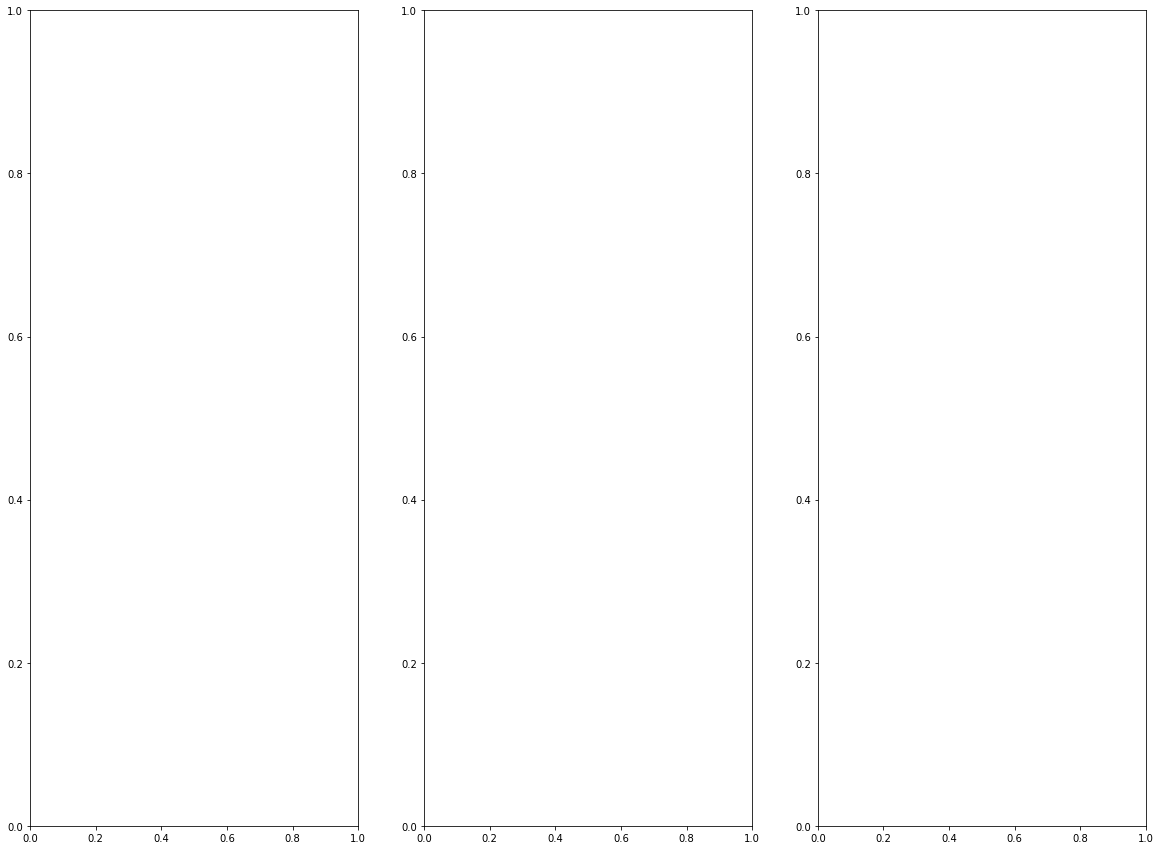

In [16]:
plotarPredicao(numeroDoPocoPred.value - 1, modelo, redeNeural = True)

Devemos lembrar que na estratégia de separação, consideramos todo o conjunto de dados. Logo, alguns poços visualizados acima todos podem conter todo o seu trecho utilizado durante o treino. Isso implica não podermos usá-los como comparativo para avaliar visualmente a performance do nosso modelo. 

Assim, execute as duas células abaixo para observar somente os dados de teste e suas respectivas previsões, comparando litologia a litologia. Note ainda que essa visualização não reflete de forma alguma estratigrafia ou a disposição das litologias em um poço específico.

In [17]:
numeroLito = widgets.IntSlider(min = 1, max = 12, step = 1,
                                 description = 'Litologia:')
print('Escolha um número entre 1 e 12 refere à litologia, para comparação:')
display(numeroLito)

Escolha um número entre 1 e 12 refere à litologia, para comparação:


IntSlider(value=1, description='Litologia:', max=12, min=1)

NameError: ignored

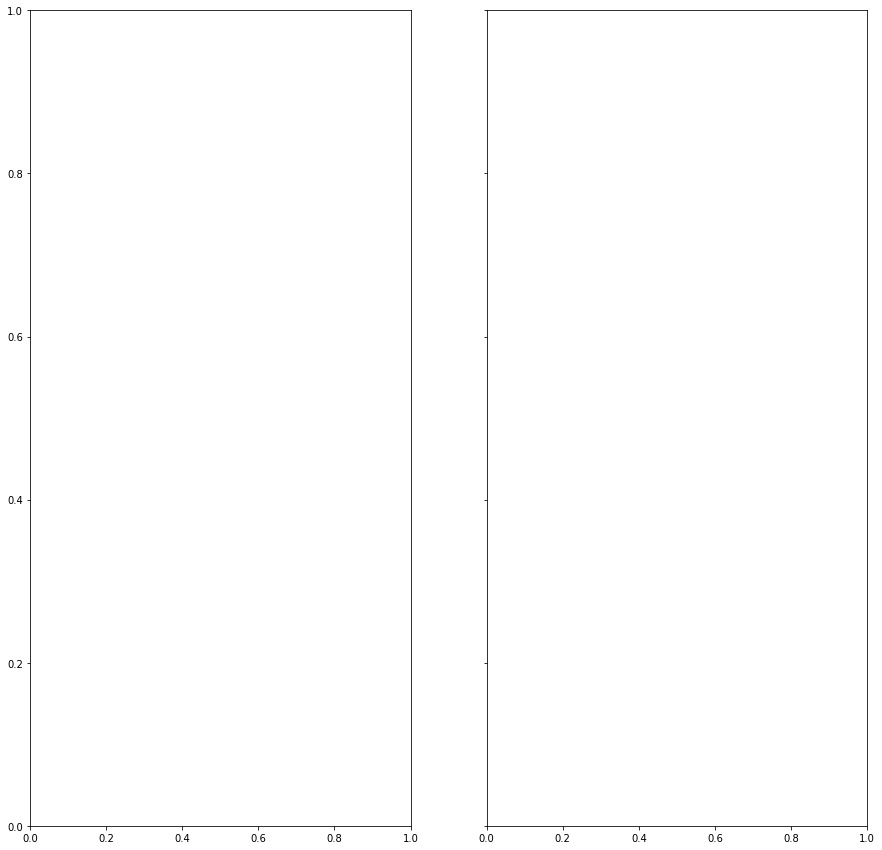

In [18]:
plotarTeste(modelo, numeroLito.value - 1, redeNeural = True)

Vimos acima uma métrica numérica para avaliar a performance do nosso modelo: a acurácia. A acurácia compara o total de acertos com o número de exemplos na nosso conjunto de teste que está sendo avaliado através da fórmula:

<center> $ \frac {Total \: de \: acertos} {Total  \:  de  \:  exemplos}$ </center>

O problema dessa métrica é que ela avalia todas as classes/litologias ao mesmo tempo, mas não nos informa individualmente a eficiência de previsão de uma certa litologia. Por isso, é importante também utilizar as métricas Precisão, Recall e F1-Score, definidas do seguinte modo:

<center>
Precisão:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: verdadeiros}$

Recall:

$ \frac {Positivos \: verdadeiros} {Positivos \: verdadeiros \: + \:Falsos \: negativos}$

F1-Score:

$ 2 \cdot \frac {Precisao \:\cdot\: Recall} {Precisao \:+\: Recall}$

</center>

Quanto mais próximos de 1, melhor a eficiência de predição da litologia, e quanto mais próximo de 0, pior. Na dúvida, basta olhar para o F1-Score visto que o mesmo leva em consideração tanto precisão quanto recall para unificar as métricas.

In [ ]:
print(classification_report(yteste, np.argmax(modelo.predict(xteste), axis = 1),
                            target_names = lithology_keys.values()))

Uma outra forma de observar os resultados individualmente é a matriz de confusão. Execute a célula abaixo e vamos discutir o significado da matriz de confusão e como realizar sua leitura.

NameError: ignored

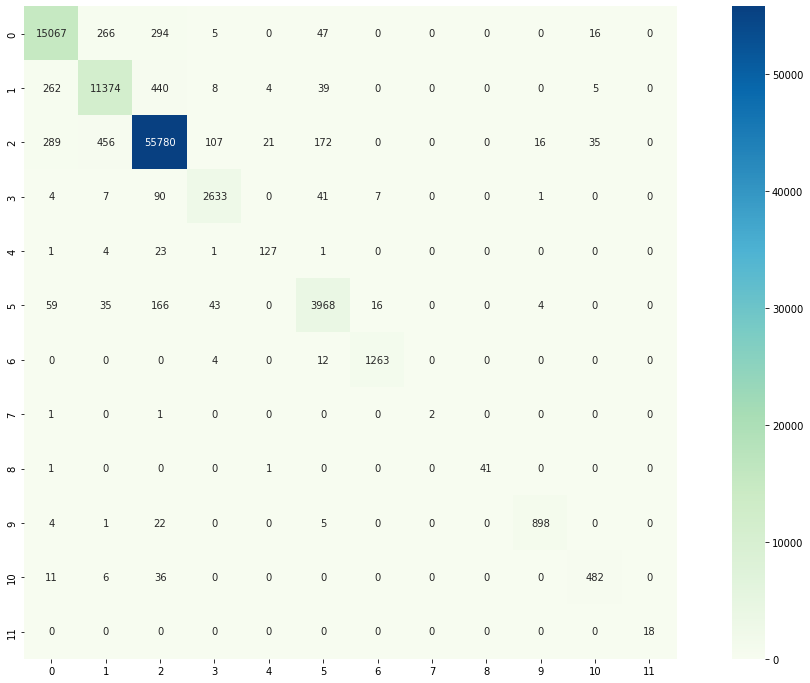

In [19]:
confusionMatrix = confusion_matrix(yteste, np.argmax(modelo.predict(xteste), axis = 1))

fig, ax = plt.subplots(1, 1, figsize = (20 , 12))

sns.heatmap(confusionMatrix, cmap = 'GnBu', annot = True, square = True,
            ax = ax, fmt = 'g')
ax.set_xticklabels(list(lithology_keys.values()), rotation = 'vertical')
ax.set_yticklabels(list(lithology_keys.values()), rotation = 'horizontal')
ax.set_title('Matriz de confusão', fontsize = 14)
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro');

## E agora, o que fazer com o modelo pronto?

Dependendo dos resultados obtidos, o que fazer com o modelo pronto vai depender em que segmento estamos: academia ou indústria. Caso os resultados não foram positivos, a modelagem ou mesmo os dados devem ser revistos. Vamos tentar disuctir alguns possíveis pontos.

In [20]:
modelo.save('litho_pred.h5')